# <center>EDA One day Project - 테러의 분석 및 위험성</center>
## Objective:
● 연도별 테러 집계 시각화 : 특이점 분석 및 원인 파악

● 테러 위험 노출 상위 10개 국가 분석 및 시각화

● 테러 발발 특이점 전후 경향성 분석 : 테러 발생 국, 테러 방법, 사상자 수 등

● 중동&북아프리카 / 남아메리카 / 서유럽 / 동남아시아 4개 지역 테러 공격 형태 및 사망자 사상자의 수 등 특이 사항 분석

● 테러 위협: 데이터로 전하는 경고

### Reference

[1] How has terrorism changed over years? (Geography), https://www.kaggle.com/code/nikitagrec/how-has-terrorism-changed-over-years-geography

[2] Visual with Animation in Global Terrorism Dataset, https://www.kaggle.com/code/mathchi/visual-with-animation-in-global-terrorism-dataset

[3] Global Terrorism Trends (Animation) https://www.kaggle.com/code/ronaldtroncoso20/global-terrorism-trends-animation

[4] Exploratory Data Analysis - Terrorism https://www.kaggle.com/code/razamh/exploratory-data-analysis-terrorism

[5] Terrorism Around The World - https://www.kaggle.com/code/ash316/terrorism-around-the-world

[6] "지난해 사상 테러 최다, 1만5000여명 사망" - https://www.mk.co.kr/news/world/5771231

## I. 연도별 테러 집계 및 시각화 : 특이점 분석 및 원인 파악

###  1) 데이터 분석을 위한 초기 환경 세팅

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import koreanize_matplotlib
from mpl_toolkits.basemap import Basemap
import folium
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')


try:
    terror = pd.read_csv('../data/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [2]:
terror.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [3]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
# 
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive', 'success', 'eventid']]


terror.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  success       eventid  
0     Unknown    NaN        1  197000000001  
1     Unknown    NaN        1  197000000002  
2     Unknown    NaN        1  197001000001  
3  Explosives    NaN        1  197001000002  
4  Incendiary    NaN        1  197001000003

In [6]:
terror[terror.isnull()] = 0

terror.isnull().sum()

terror = terror.dropna(thresh=160000, axis=1)

In [7]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181691 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     181691 non-null  float64
 8   longitude    181691 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  float64
 11  Wounded      181691 non-null  float64
 12  Target       181691 non-null  object 
 13  Summary      181691 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       181691 non-null  object 
 18  success      181691 non-

## 2) 연도별 테러 집계 시각화

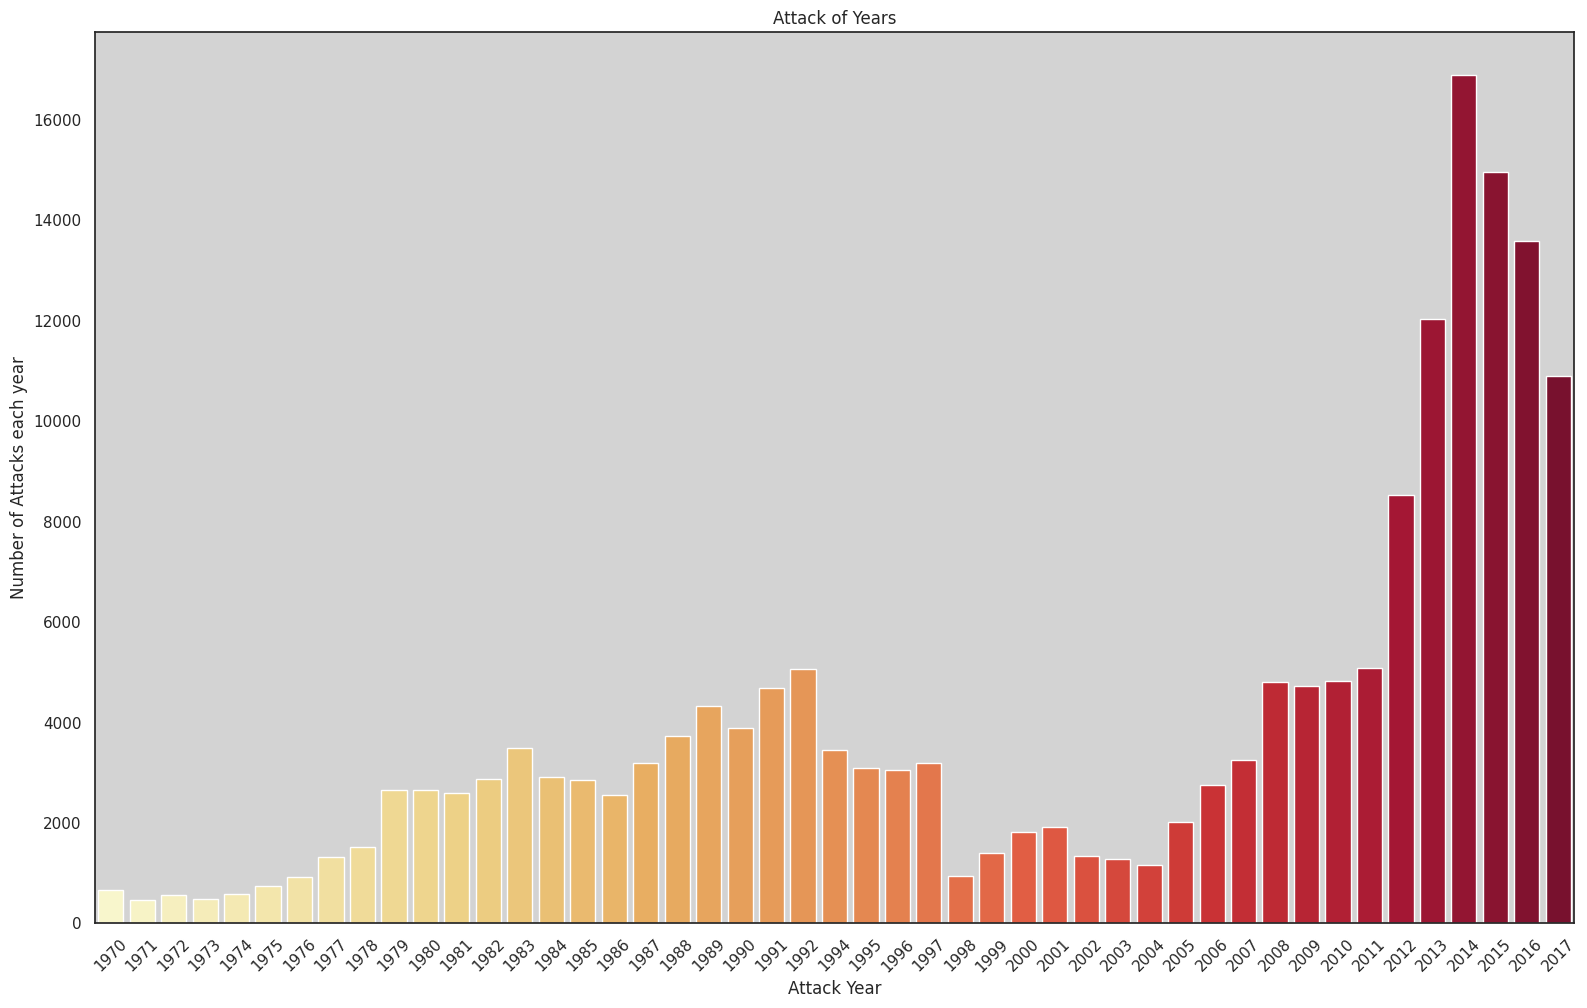

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
 
color_palette = "YlOrRd"

sns.set(style="white")

x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna=False).sort_index()

plt.figure(figsize=(17, 11))
sns.barplot(x=x_year,
            y=y_count_years,
            palette=color_palette)
plt.xticks(rotation=45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack of Years')

plt.gca().set_facecolor("lightgray")

plt.show()


## 3) 특이점 분석 및 원인 파악 - 시각데이터로 팩트체크

## 2012년 이후로 급격한 테러 횟수의 증가의 원인을 분석하면 다음과 같다.

*  중동 지역에서 수니·시아파 간 분쟁 증가, 정정 불안, 전쟁 도구로 테러 활용, 경제 문제에 대한 불만 고조 등이 꼽힌다고 테러리즘연구소(START)의 보고서를 통해 보도 - 매일경제

*  대량살상이 가능한 폭발물이 테러에 사용돼 사상자는 크게 늘었다. 라프리 소장은 "테러단체들은 특정 메시지를 전달하고 싶어하기에 더 많은 사람들이 희생될수록 더 '성공적'이라고 평가하기 때문"

 &nbsp;

# <center>Fact Check 1. 2012년 이후, 중동 지역(Middle East & North Africa)이 핵심인가?</center>

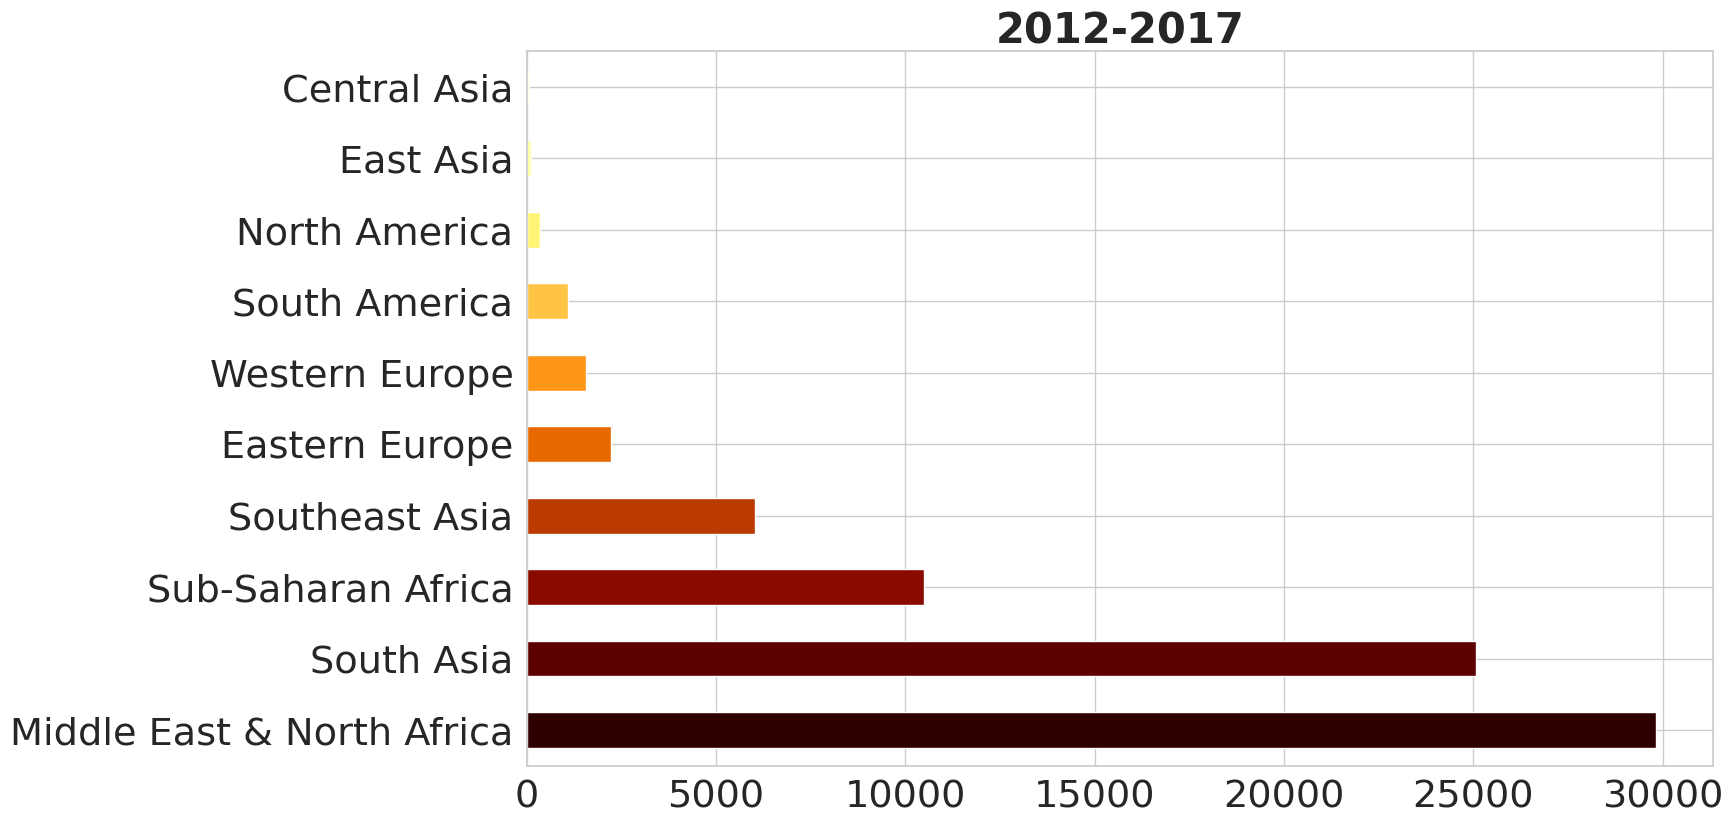

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_by_years(kind='Region', big=(15, 15)):
    sns.set(style="whitegrid", font_scale=2.5)
    fig = plt.figure(figsize=big)
    
    ax1 = fig.add_subplot(3, 2, 1)
    ax1.set_title('2012-2017', fontweight='bold')
    ax1.set_ylabel('', fontweight='bold')

  
    colors = sns.color_palette("afmhot", 10)  

   
    terror[terror['Year'] >= 2012]['eventid'].groupby(terror[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh', color=colors)

    ax1.set_ylabel('')

plot_by_years(kind='Region', big=(30, 30))


# <center>Fact Check 2. 그 무기가 대량살상 무기들인가 </center>
# <center> 이로인한 사상자는 어떤 사람들이며 수치적으로 크게 늘었는가??</center>

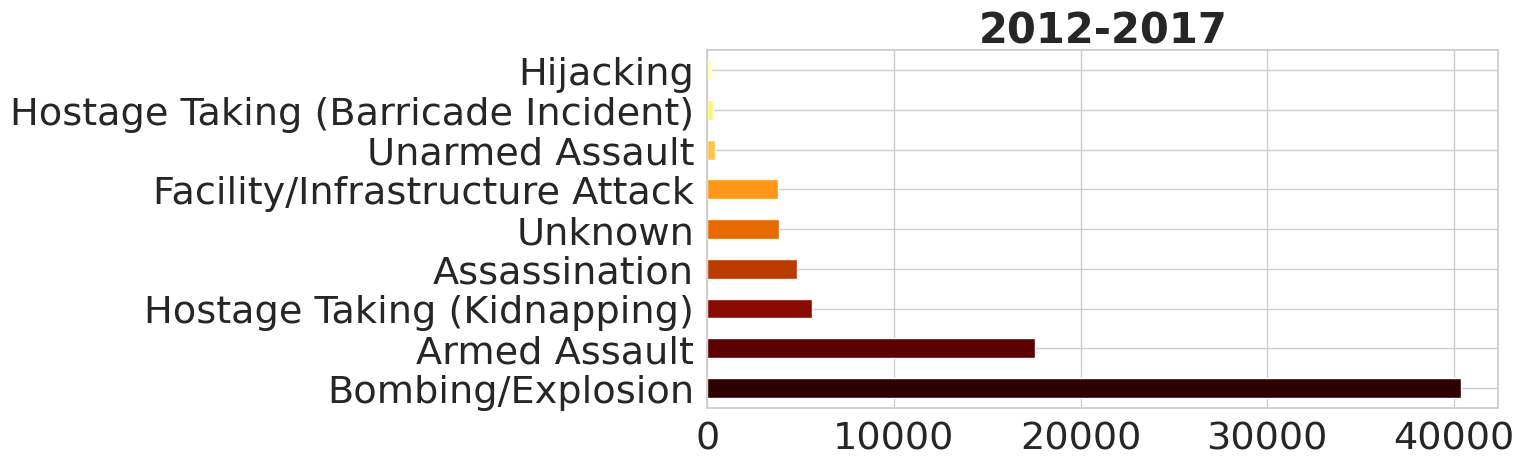

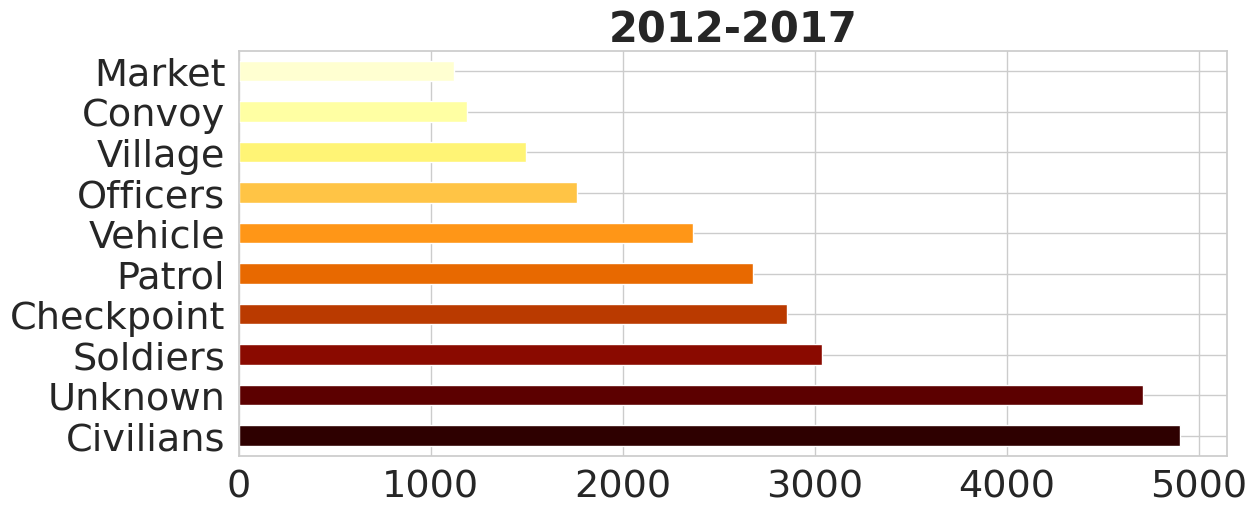

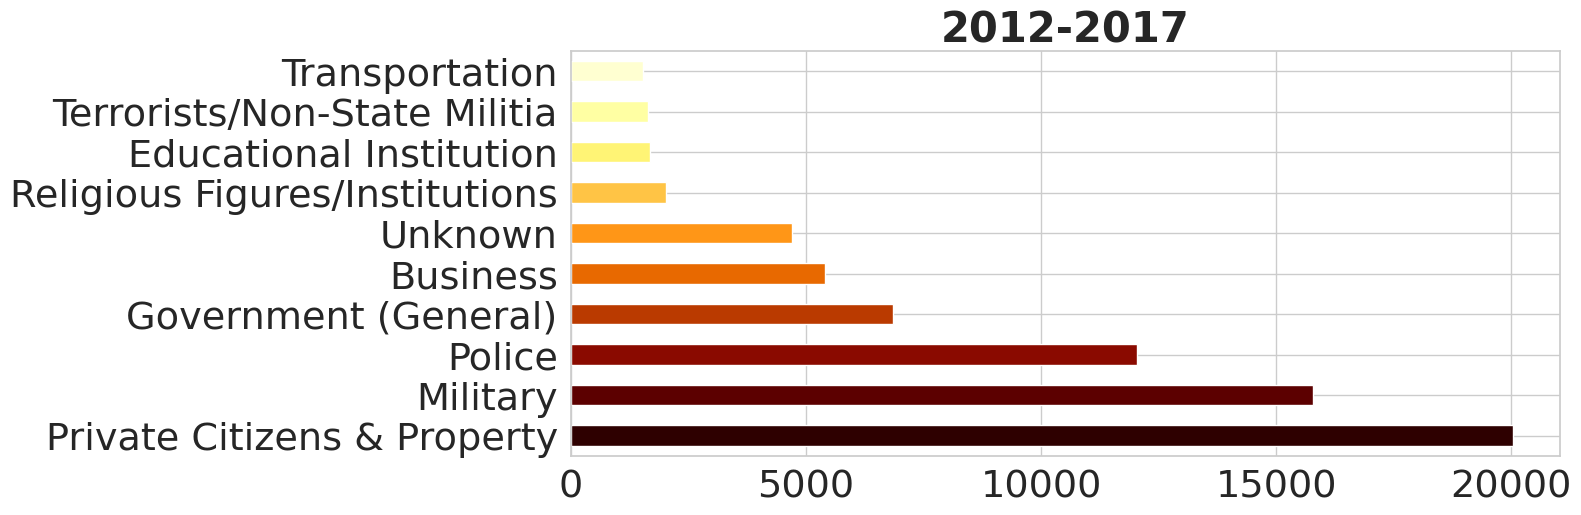

In [10]:
plot_by_years(kind='AttackType', big=(20, 15))
plot_by_years(kind='Target', big=(25, 17))
plot_by_years(kind='Target_type', big=(25, 17))

# II. 테러 위험 노출 상위 10개 국가 분석 및 시각화

## 1. 세계지도 기반 지역별 테러 분포 확인

In [11]:
regions = list(set(terror.Region))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightseagreen', 'lightgray', 'navy']

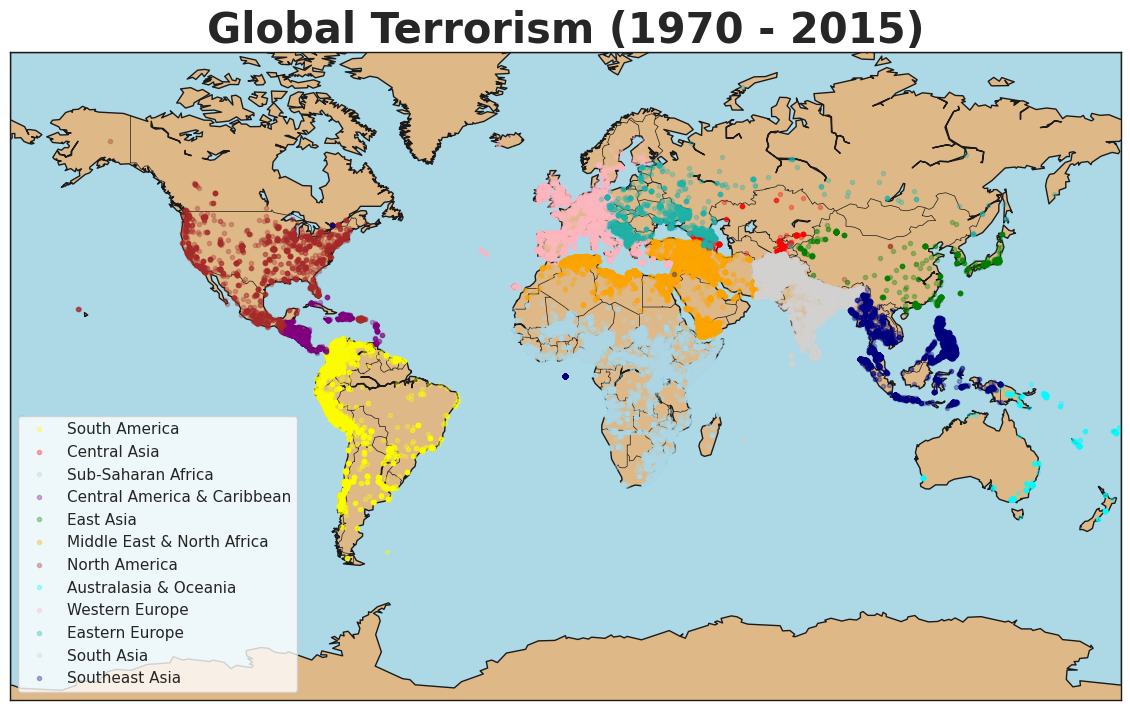

In [12]:
plt.figure(figsize=(20, 8))
m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood', lake_color='lightblue', zorder=1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color=None, label=None):
    
    x, y = m(list(terror.longitude[terror.Region == region].astype("float")),
             list(terror.latitude[terror.Region == region].astype("float")))
    points = m.plot(x, y, "o", markersize=3, color=color, label=label, alpha=0.3)  
    return points

for i, region in enumerate(regions):
    pltpoints(region, color=colors[i], label=region)

plt.title("Global Terrorism (1970 - 2015)", fontweight='bold')
plt.legend(loc='lower left', prop={'size': 11})
plt.show()


## 2) 발생 년도에 따른 지역별 테러 현황

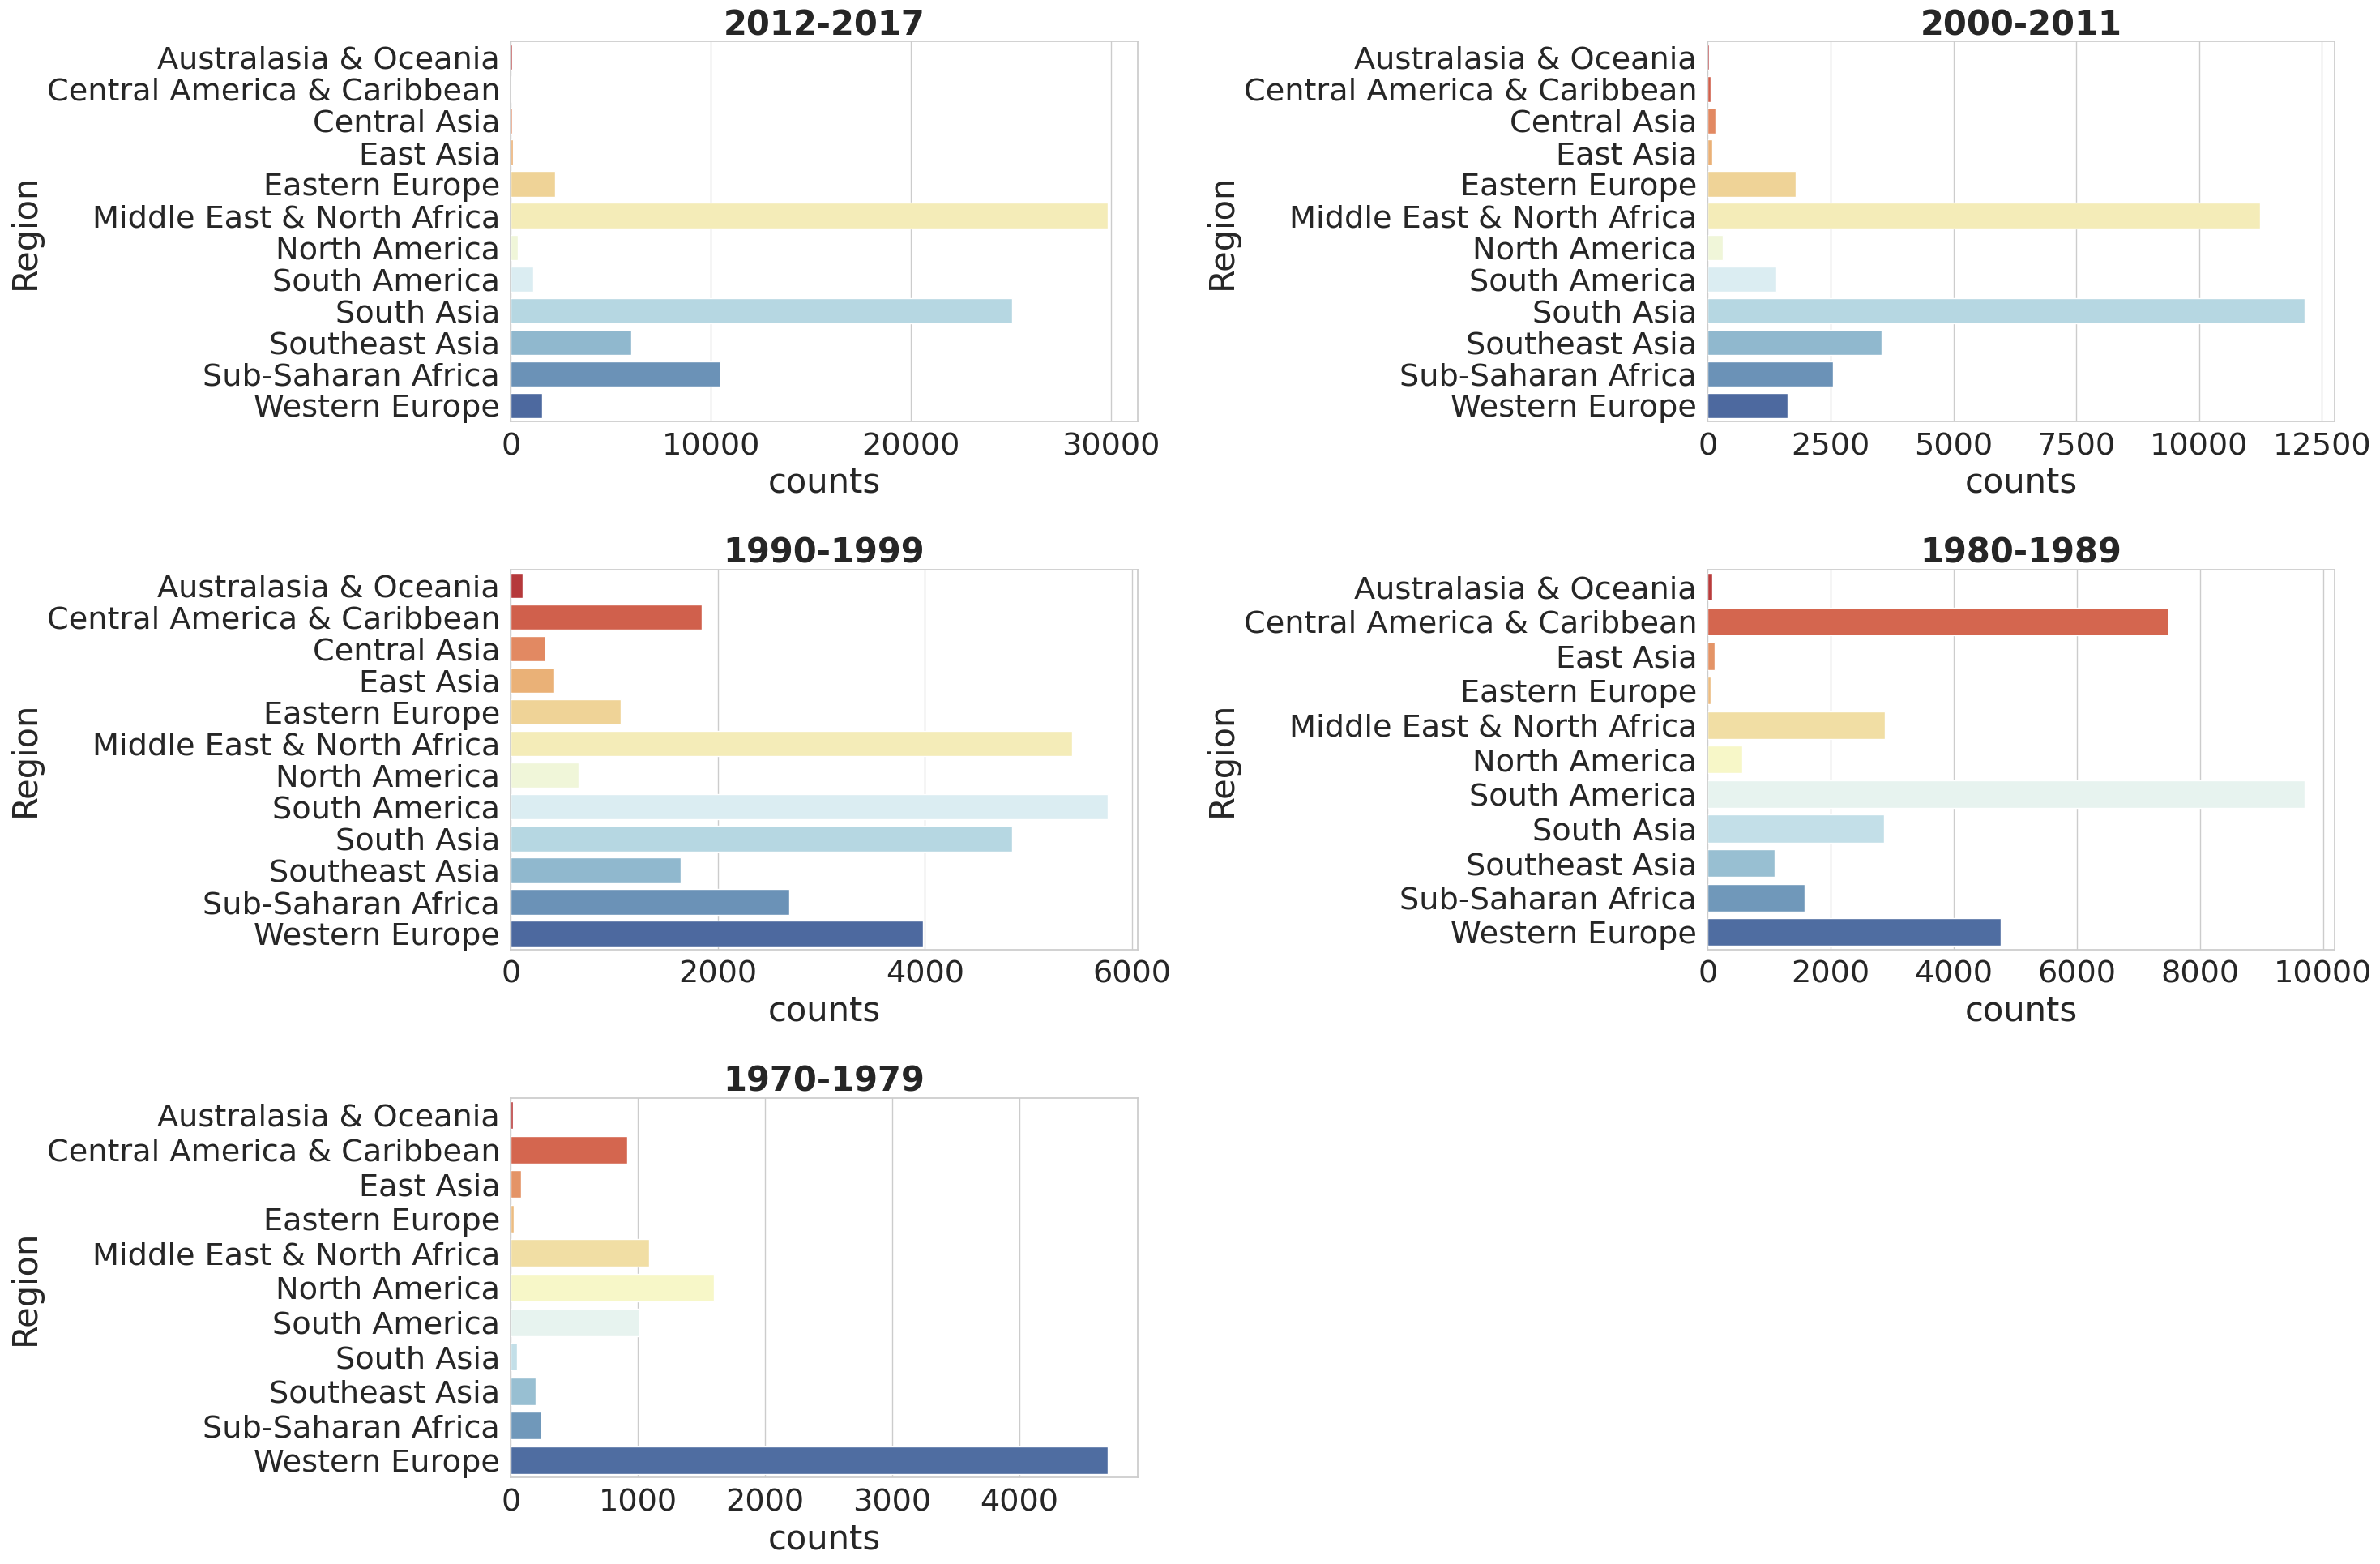

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_by_years_grouped(kind='Region', big=(30, 20)):
    sns.set(style="whitegrid", font_scale=2.5)
    fig = plt.figure(figsize=big)
    
    decades = [(2012, 2017), (2000, 2011), (1990, 1999), (1980, 1989), (1970, 1979)]
    palettes = ['RdYlBu', 'RdYlBu', 'RdYlBu', 'RdYlBu', 'RdYlBu']
    
    for i, (start_year, end_year) in enumerate(decades):
        ax = fig.add_subplot(3, 2, i + 1)
        ax.set_title(f'{start_year}-{end_year}', fontweight='bold')
        ax.set_ylabel('')
        
        # Grouping by 'kind' and counting
        data_grouped = terror[(terror['Year'] >= start_year) & (terror['Year'] <= end_year)].groupby(kind).size().reset_index(name='counts')
        sns.barplot(x='counts', y=kind, data=data_grouped, palette=palettes[i], ax=ax)
    
    plt.tight_layout()

plot_by_years_grouped(kind='Region')


# 실행시, 다른 folium 커널은 끄고 실행하시오

In [14]:
# import folium
# from folium.plugins import MarkerCluster 


# filterYears = (terror['Year'] >= 1970) & (terror['Year'] <= 2017)
# filterData = terror[filterYears] 


# reqFilterData = filterData.loc[:, ['city', 'latitude', 'longitude']].dropna()


# reqFilterDataList = reqFilterData.values.tolist()


# map = folium.Map(location=[0, 30], tiles='CartoDB positron', zoom_start=2)


# markerCluster = folium.plugins.MarkerCluster().add_to(map)


# for point in reqFilterDataList:
#     folium.Marker(location=[point[1], point[2]], popup=point[0]).add_to(markerCluster)


# map


![Screenshot from 2024-01-10 17-26-14.png](<attachment:Screenshot from 2024-01-10 17-26-14.png>) 

![Screenshot from 2024-01-10 17-26-57.png](<attachment:Screenshot from 2024-01-10 17-26-57.png>)
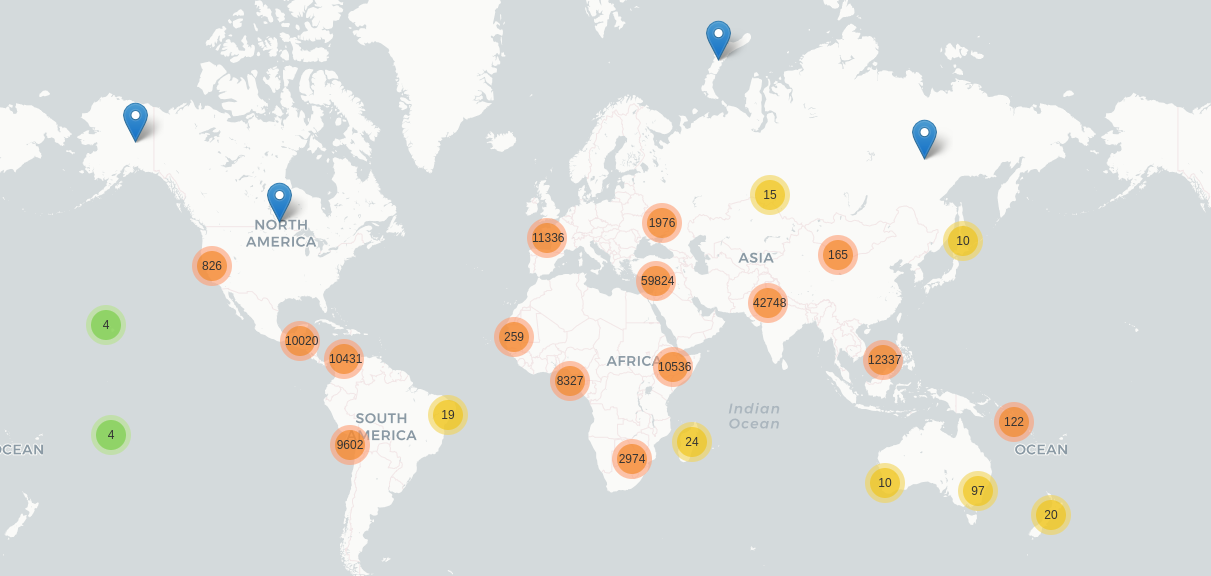
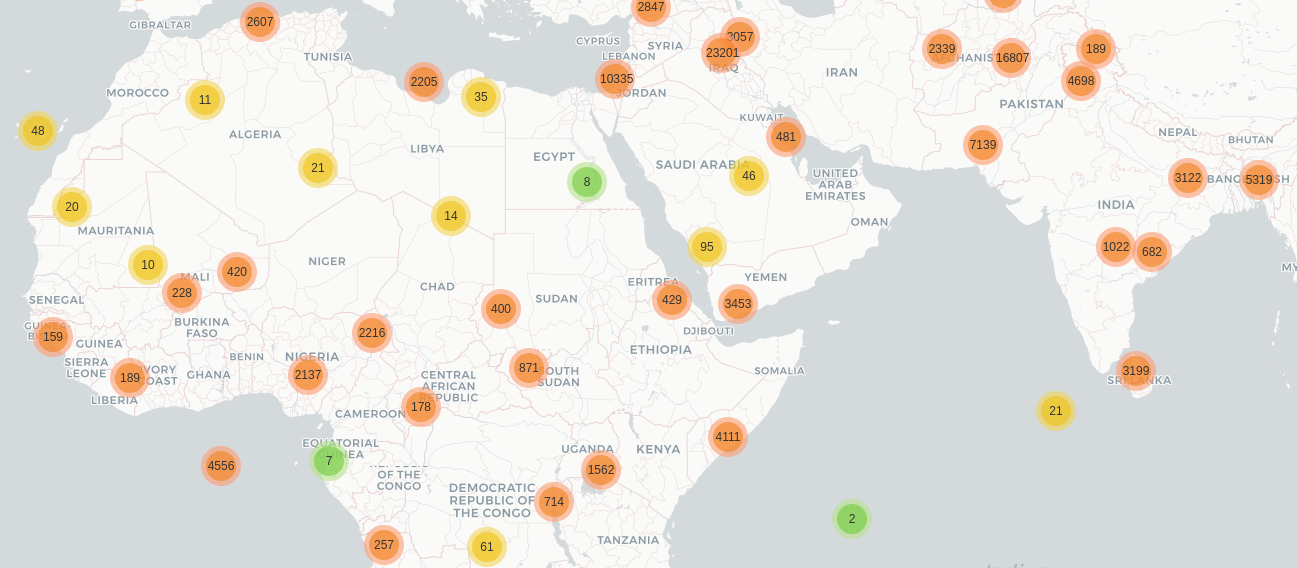

## 3. 국가별 테러 분포 확인 TOP 10

가장 많이 테러가 발생한 국가 : Iraq : 24636 회 공격

 이외 테러가 많이 발생한 국가 TOP 9:
2. Pakistan : 14368 회 공격
3. Afghanistan : 12731 회 공격
4. India : 11960 회 공격
5. Colombia : 8306 회 공격
6. Philippines : 6908 회 공격
7. Peru : 6096 회 공격
8. El Salvador : 5320 회 공격
9. United Kingdom : 5235 회 공격
10. Turkey : 4292 회 공격


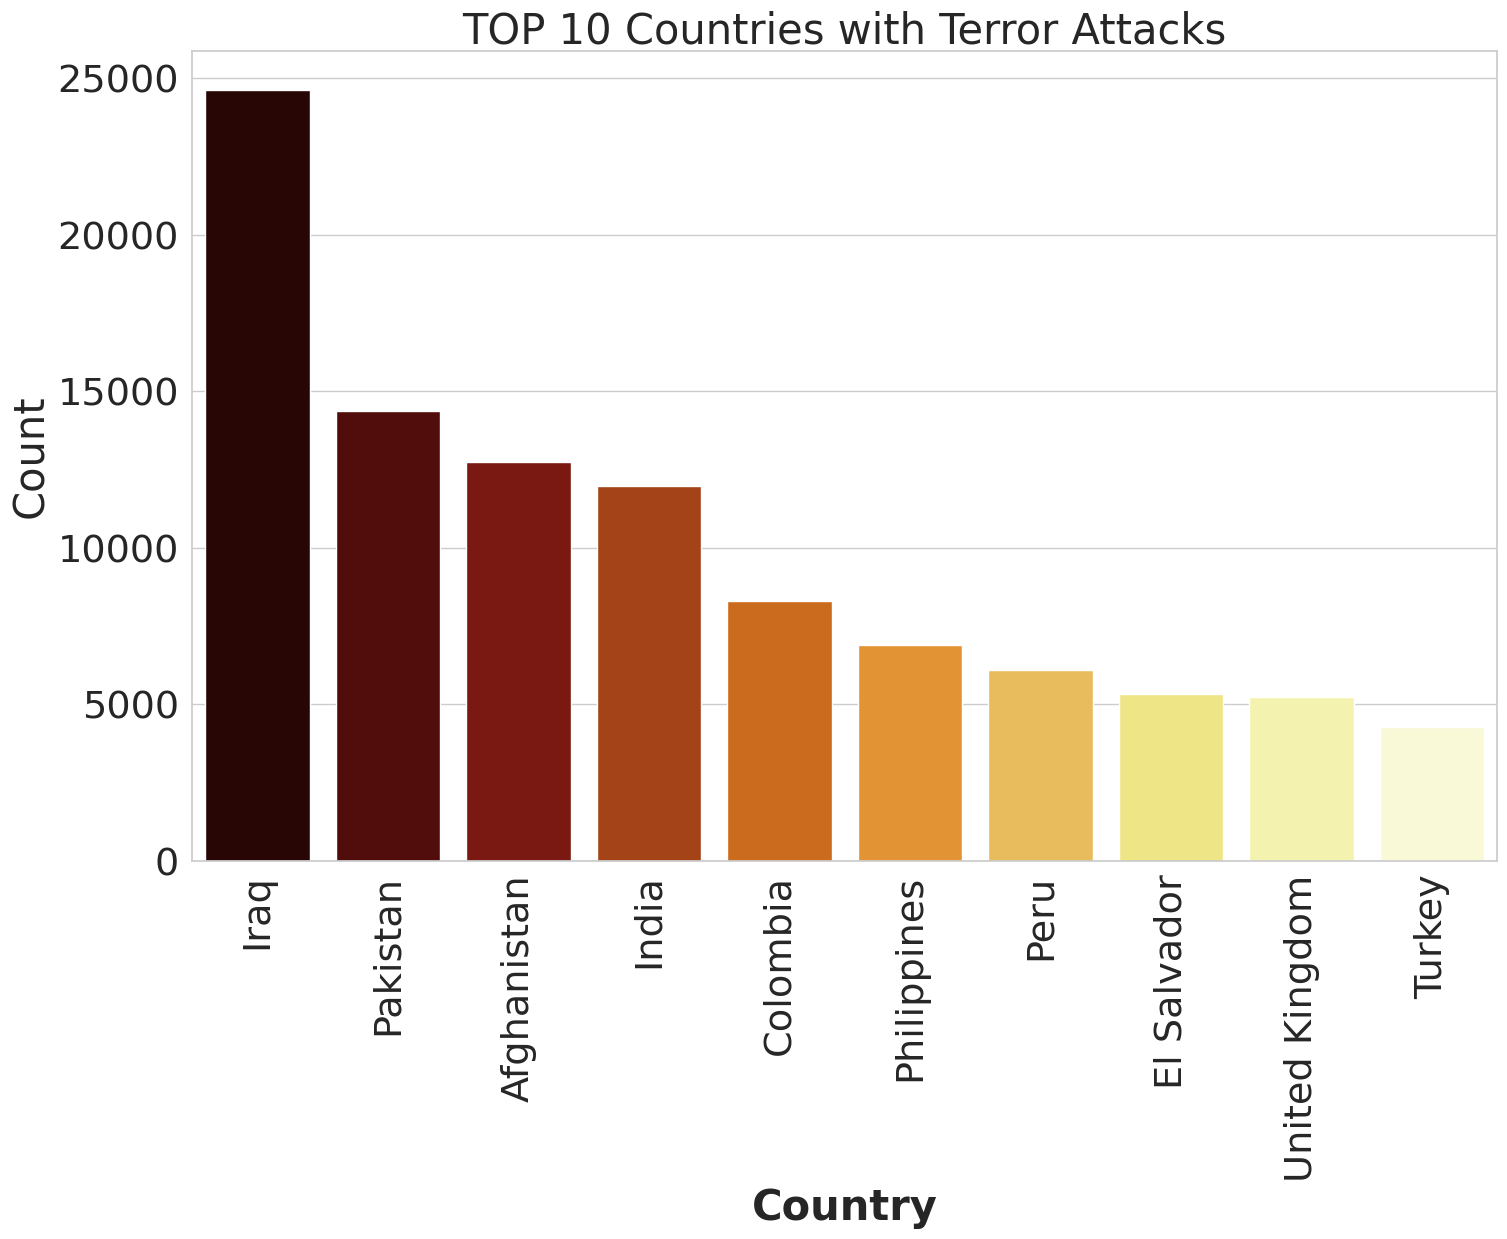

In [15]:
print(f"가장 많이 테러가 발생한 국가 : {terror.Country.value_counts().index[0]} : {terror.Country.value_counts().max()} 회 공격")

print('\n 이외 테러가 많이 발생한 국가 TOP 9:')
for i in range(1,10):
    print(f"{i+1}. {terror.Country.value_counts().index[i]} : {terror.Country.value_counts()[i]} 회 공격")


plt.subplots(figsize=(15,10))
sns.barplot(x=terror['Country'].value_counts()[:10].index, y=terror['Country'].value_counts()[:10].values, palette='afmhot')
plt.title('TOP 10 Countries with Terror Attacks', )
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## III. 테러 발발 특이점 전후(2012년 이후) 경향성 분석 : 테러 발생 국, 테러 방법, 사상자 수 등

# 1) 2012년 이후 TOP 10 국가는 전체 통계와 동일할까?

2012년 이후 가장 많이 테러가 발생한 국가 : Iraq : 16799 회 공격

2012년 이후 테러가 많이 발생한 국가 TOP 9:
2. Afghanistan : 9695 회 공격
3. Pakistan : 8846 회 공격
4. India : 5040 회 공격
5. Philippines : 3542 회 공격
6. Nigeria : 3331 회 공격
7. Somalia : 3173 회 공격
8. Yemen : 2915 회 공격
9. Libya : 2231 회 공격
10. Syria : 2003 회 공격


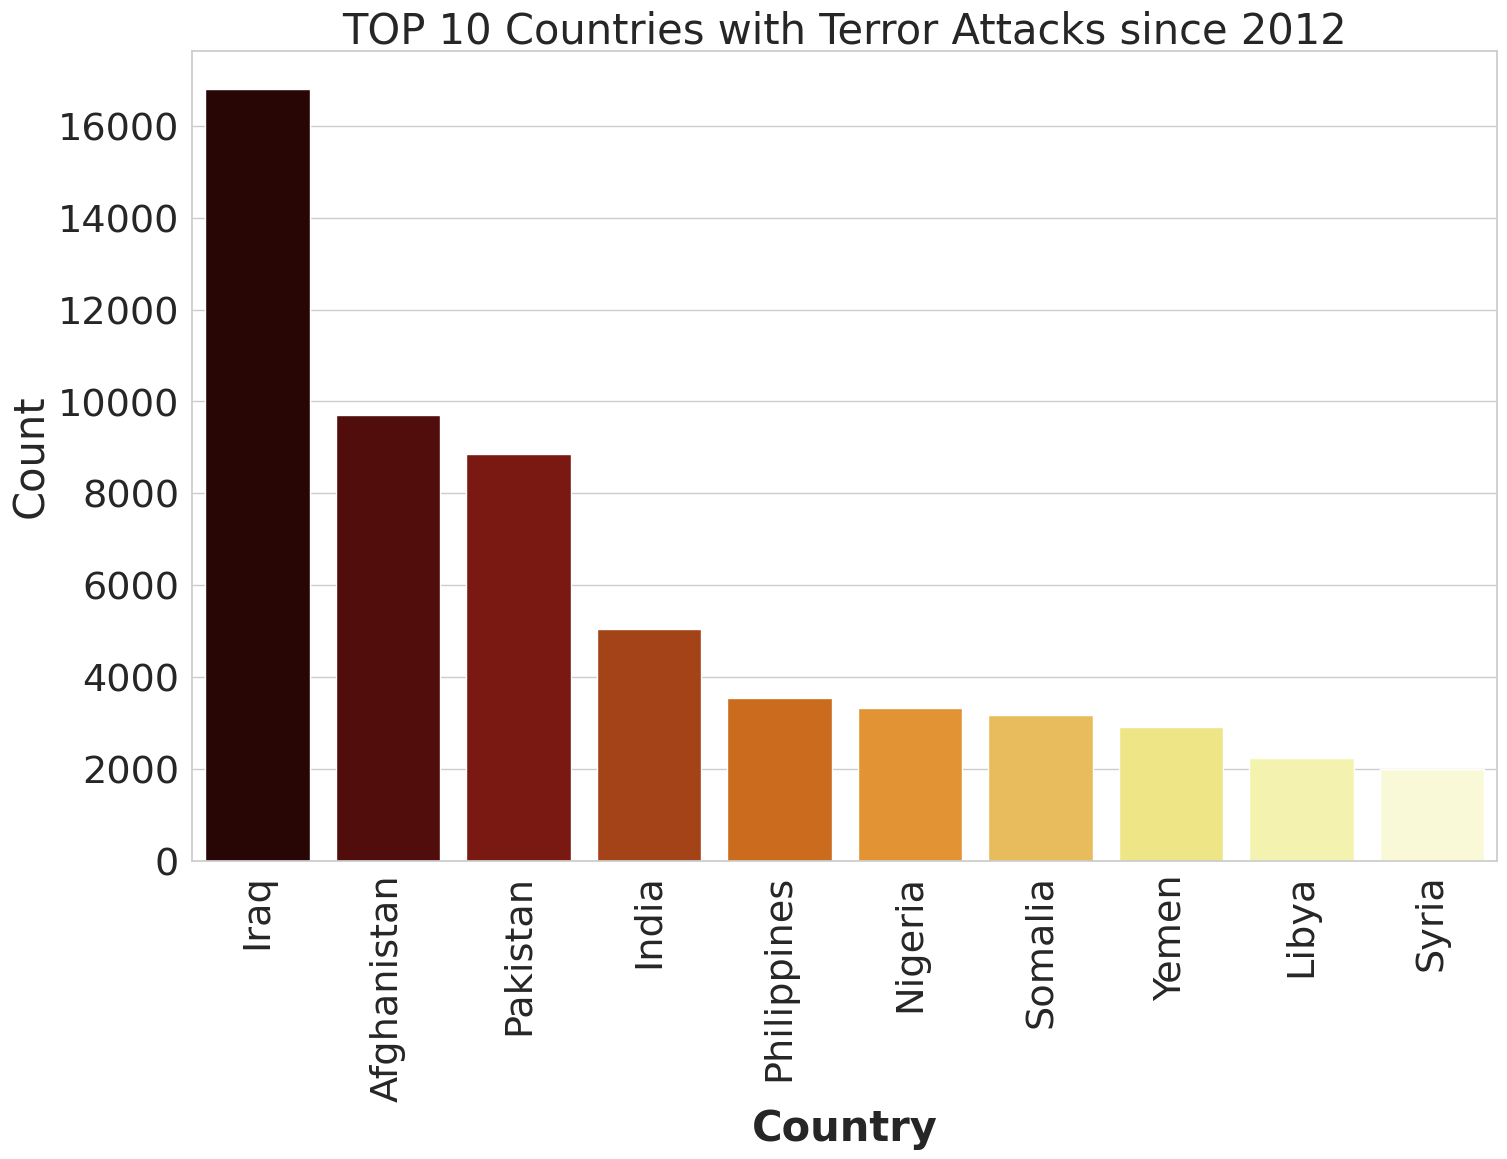

In [16]:

terror_post_2012 = terror[terror['Year'] >= 2012]

print(f"2012년 이후 가장 많이 테러가 발생한 국가 : {terror_post_2012.Country.value_counts().index[0]} : {terror_post_2012.Country.value_counts().max()} 회 공격")

print('\n2012년 이후 테러가 많이 발생한 국가 TOP 9:')
for i in range(1, 10):
    print(f"{i+1}. {terror_post_2012.Country.value_counts().index[i]} : {terror_post_2012.Country.value_counts()[i]} 회 공격")

plt.subplots(figsize=(15, 10))
sns.barplot(x=terror_post_2012['Country'].value_counts()[:10].index, y=terror_post_2012['Country'].value_counts()[:10].values, palette='afmhot')
plt.title('TOP 10 Countries with Terror Attacks since 2012', )
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




In [17]:
# import folium
# from folium.plugins import MarkerCluster 


# filterYears = (terror['Year'] >= 2012)
# filterData = terror[filterYears] 


# reqFilterData = filterData.loc[:, ['city', 'latitude', 'longitude']].dropna()


# reqFilterDataList = reqFilterData.values.tolist()


# map = folium.Map(location=[0, 30], tiles='CartoDB positron', zoom_start=2)


# markerCluster = folium.plugins.MarkerCluster().add_to(map)


# for point in reqFilterDataList:
#     folium.Marker(location=[point[1], point[2]], popup=point[0]).add_to(markerCluster)


# map

![Screenshot from 2024-01-10 17-29-08.png](<attachment:Screenshot from 2024-01-10 17-29-08.png>)
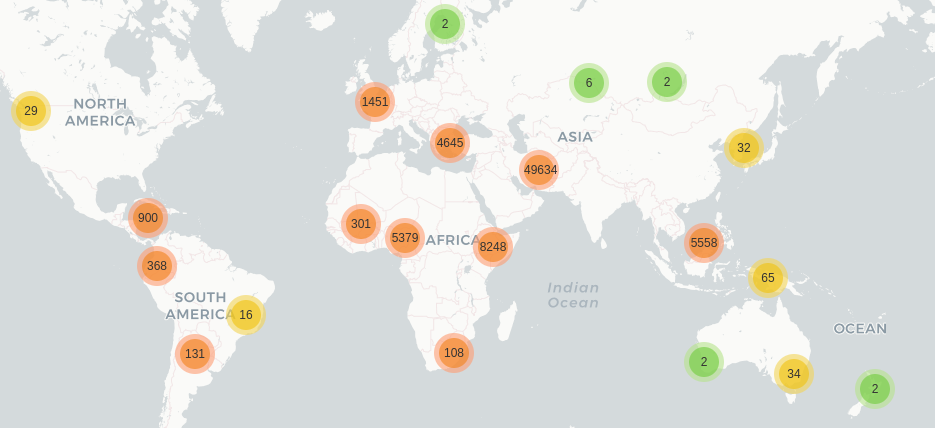

# 2) TOP 10 국가별로 발생한 테러 특징 분석

In [18]:
topten = ['Iraq', 'Afghanistan', 'Pakistan', 'India', 'Philippines', 'Nigeria', 'Somalia', 'Yemen', 'Libya', 'Syria']

filtered_data = terror[terror['Country'].isin(topten)]

attacktype_counts = filtered_data.groupby('Country')['AttackType'].value_counts().unstack().fillna(0)
targettype_counts = filtered_data.groupby('Country')['Target_type'].value_counts().unstack().fillna(0)

casualty_counts = filtered_data.groupby('Country')[['Killed', 'Wounded']].sum()

weapon_counts = filtered_data.groupby('Country')['Weapon_type'].value_counts().unstack().fillna(0)

attacktype_counts_df = pd.DataFrame(attacktype_counts)
targettype_counts_df = pd.DataFrame(targettype_counts)
casualty_counts_df = pd.DataFrame(casualty_counts)
weapon_counts_df = pd.DataFrame(weapon_counts)

attacktype_counts_percentage = attacktype_counts_df.div(attacktype_counts_df.sum(axis=1), axis=0) * 100
attacktype_counts_percentage = attacktype_counts_percentage.round().astype(int)

targettype_counts__percentage = targettype_counts_df.div(targettype_counts_df.sum(axis=1), axis=0) * 100
targettype_counts__percentage = targettype_counts__percentage.round().astype(int)

casualty_counts_percentage = casualty_counts_df.div(casualty_counts_df.sum(axis=1), axis=0) * 100
casualty_counts_percentage = casualty_counts_percentage.round().astype(int)

weapon_counts_percentage = weapon_counts_df.div(weapon_counts_df.sum(axis=1), axis=0) * 100
weapon_counts_percentage = weapon_counts_percentage.round().astype(int)


attacktype_counts_percentage

AttackType   Armed Assault  Assassination  Bombing/Explosion  \
Country                                                        
Afghanistan             23              7                 49   
India                   27             10                 40   
Iraq                    13              5                 74   
Libya                   18              9                 43   
Nigeria                 44              5                 29   
Pakistan                27             10                 53   
Philippines             31             16                 32   
Somalia                 28             12                 39   
Syria                    9              4                 68   
Yemen                   20             13                 41   

AttackType   Facility/Infrastructure Attack  Hijacking  \
Country                                                  
Afghanistan                               3          0   
India                                     8          0   
Iraq                                      1          0   
Libya                                     4          1   
Nigeria                                   6          0   
Pakistan                                  2          0   
Philippines                               7          0   
Somalia                                   1          1   
Syria                                     1          0   
Yemen                                     3          0   

AttackType   Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Country                                                                         
Afghanistan                                    0                            8   
India                                          0                           10   
Iraq                                           0                            4   
Libya                                          0                           19   
Nigeria                                        1                           12   
Pakistan                                       0                            6   
Philippines                                    1                            9   
Somalia                                        0                            9   
Syria                                          0                           11   
Yemen                                          0                           11   

AttackType   Unarmed Assault  Unknown  
Country                                
Afghanistan                1        9  
India                      1        3  
Iraq                       0        3  
Libya                      0        6  
Nigeria                    0        3  
Pakistan                   1        2  
Philippines                0        4  
Somalia                    0        9  
Syria                      0        7  
Yemen                      0       11

In [19]:
targettype_counts__percentage

Target_type  Airports & Aircraft  Business  Educational Institution  \
Country                                                               
Afghanistan                    1         4                        3   
India                          0         9                        2   
Iraq                           0         9                        1   
Libya                          2         9                        2   
Nigeria                        0         7                        3   
Pakistan                       0         8                        7   
Philippines                    0        14                        2   
Somalia                        1         4                        1   
Syria                          0         4                        2   
Yemen                          0         4                        1   

Target_type  Food or Water Supply  Government (Diplomatic)  \
Country                                                      
Afghanistan                     0                        1   
India                           0                        0   
Iraq                            0                        1   
Libya                           0                        3   
Nigeria                         0                        0   
Pakistan                        0                        1   
Philippines                     0                        0   
Somalia                         0                        3   
Syria                           0                        2   
Yemen                           0                        2   

Target_type  Government (General)  Journalists & Media  Maritime  Military  \
Country                                                                      
Afghanistan                    13                    1         0        18   
India                          14                    1         0         8   
Iraq                            9                    1         0        14   
Libya                          11                    3         0        24   
Nigeria                        10                    1         1         9   
Pakistan                        8                    1         0        12   
Philippines                    19                    1         1        23   
Somalia                        17                    2         0        39   
Syria                           4                    3         0        27   
Yemen                          13                    2         0        31   

Target_type  NGO  ...  Police  Private Citizens & Property  \
Country           ...                                        
Afghanistan    1  ...      28                           21   
India          0  ...      19                           26   
Iraq           0  ...      15                           36   
Libya          1  ...       8                           25   
Nigeria        0  ...       9                           44   
Pakistan       1  ...      13                           24   
Philippines    0  ...       9                           16   
Somalia        2  ...       6                           18   
Syria          1  ...       3                           40   
Yemen          1  ...       7                           19   

Target_type  Religious Figures/Institutions  Telecommunication  \
Country                                                          
Afghanistan                               2                  1   
India                                     2                  1   
Iraq                                      3                  0   
Libya                                     3                  0   
Nigeria                                   6                  1   
Pakistan                                  4                  0   
Philippines                               2                  1   
Somalia                                   1                  0   
Syria                                     3                 

In [20]:
casualty_counts_percentage

Killed  Wounded
Country                     
Afghanistan      47       53
India            40       60
Iraq             37       63
Libya            44       56
Nigeria          69       31
Pakistan         36       64
Philippines      42       58
Somalia          54       46
Syria            52       48
Yemen            48       52

In [21]:
weapon_counts_percentage

Weapon_type  Biological  Chemical  Explosives  Fake Weapons  Firearms  \
Country                                                                 
Afghanistan           0         0          53             0        30   
India                 0         0          42             0        38   
Iraq                  0         0          77             0        17   
Libya                 0         0          46             0        34   
Nigeria               0         0          34             0        52   
Pakistan              0         0          56             0        35   
Philippines           0         0          34             0        52   
Somalia               0         0          48             0        35   
Syria                 0         0          73             0        11   
Yemen                 0         0          47             0        33   

Weapon_type  Incendiary  Melee  Other  Radiological  Sabotage Equipment  \
Country                                                                   
Afghanistan           2      1      0             0                   0   
India                 8      4      0             0                   0   
Iraq                  1      0      0             0                   0   
Libya                 2      2      0             0                   0   
Nigeria               6      2      0             0                   0   
Pakistan              3      1      0             0                   0   
Philippines           5      1      0             0                   0   
Somalia               1      2      0             0                   0   
Syria                 1      1      0             0                   0   
Yemen                 0      0      0             0                   0   

Weapon_type  Unknown  \
Country                
Afghanistan       13   
India              8   
Iraq               5   
Libya             17   
Nigeria            6   
Pakistan           5   
Philippines        8   
Somalia           15   
Syria             14   
Yemen             19   

Weapon_type  Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)  
Country                                                                                   
Afghanistan                                                  0                            
India                                                        0                            
Iraq                                                         0                            
Libya                                                        0                            
Nigeria                                                      0                            
Pakistan                                                     0                            
Philippines                                                  0                            
Somalia                                                      0                            
Syria                                                        0                            
Yemen                                                        0

## 3) Heatmap을 이용한 국가별 특징 

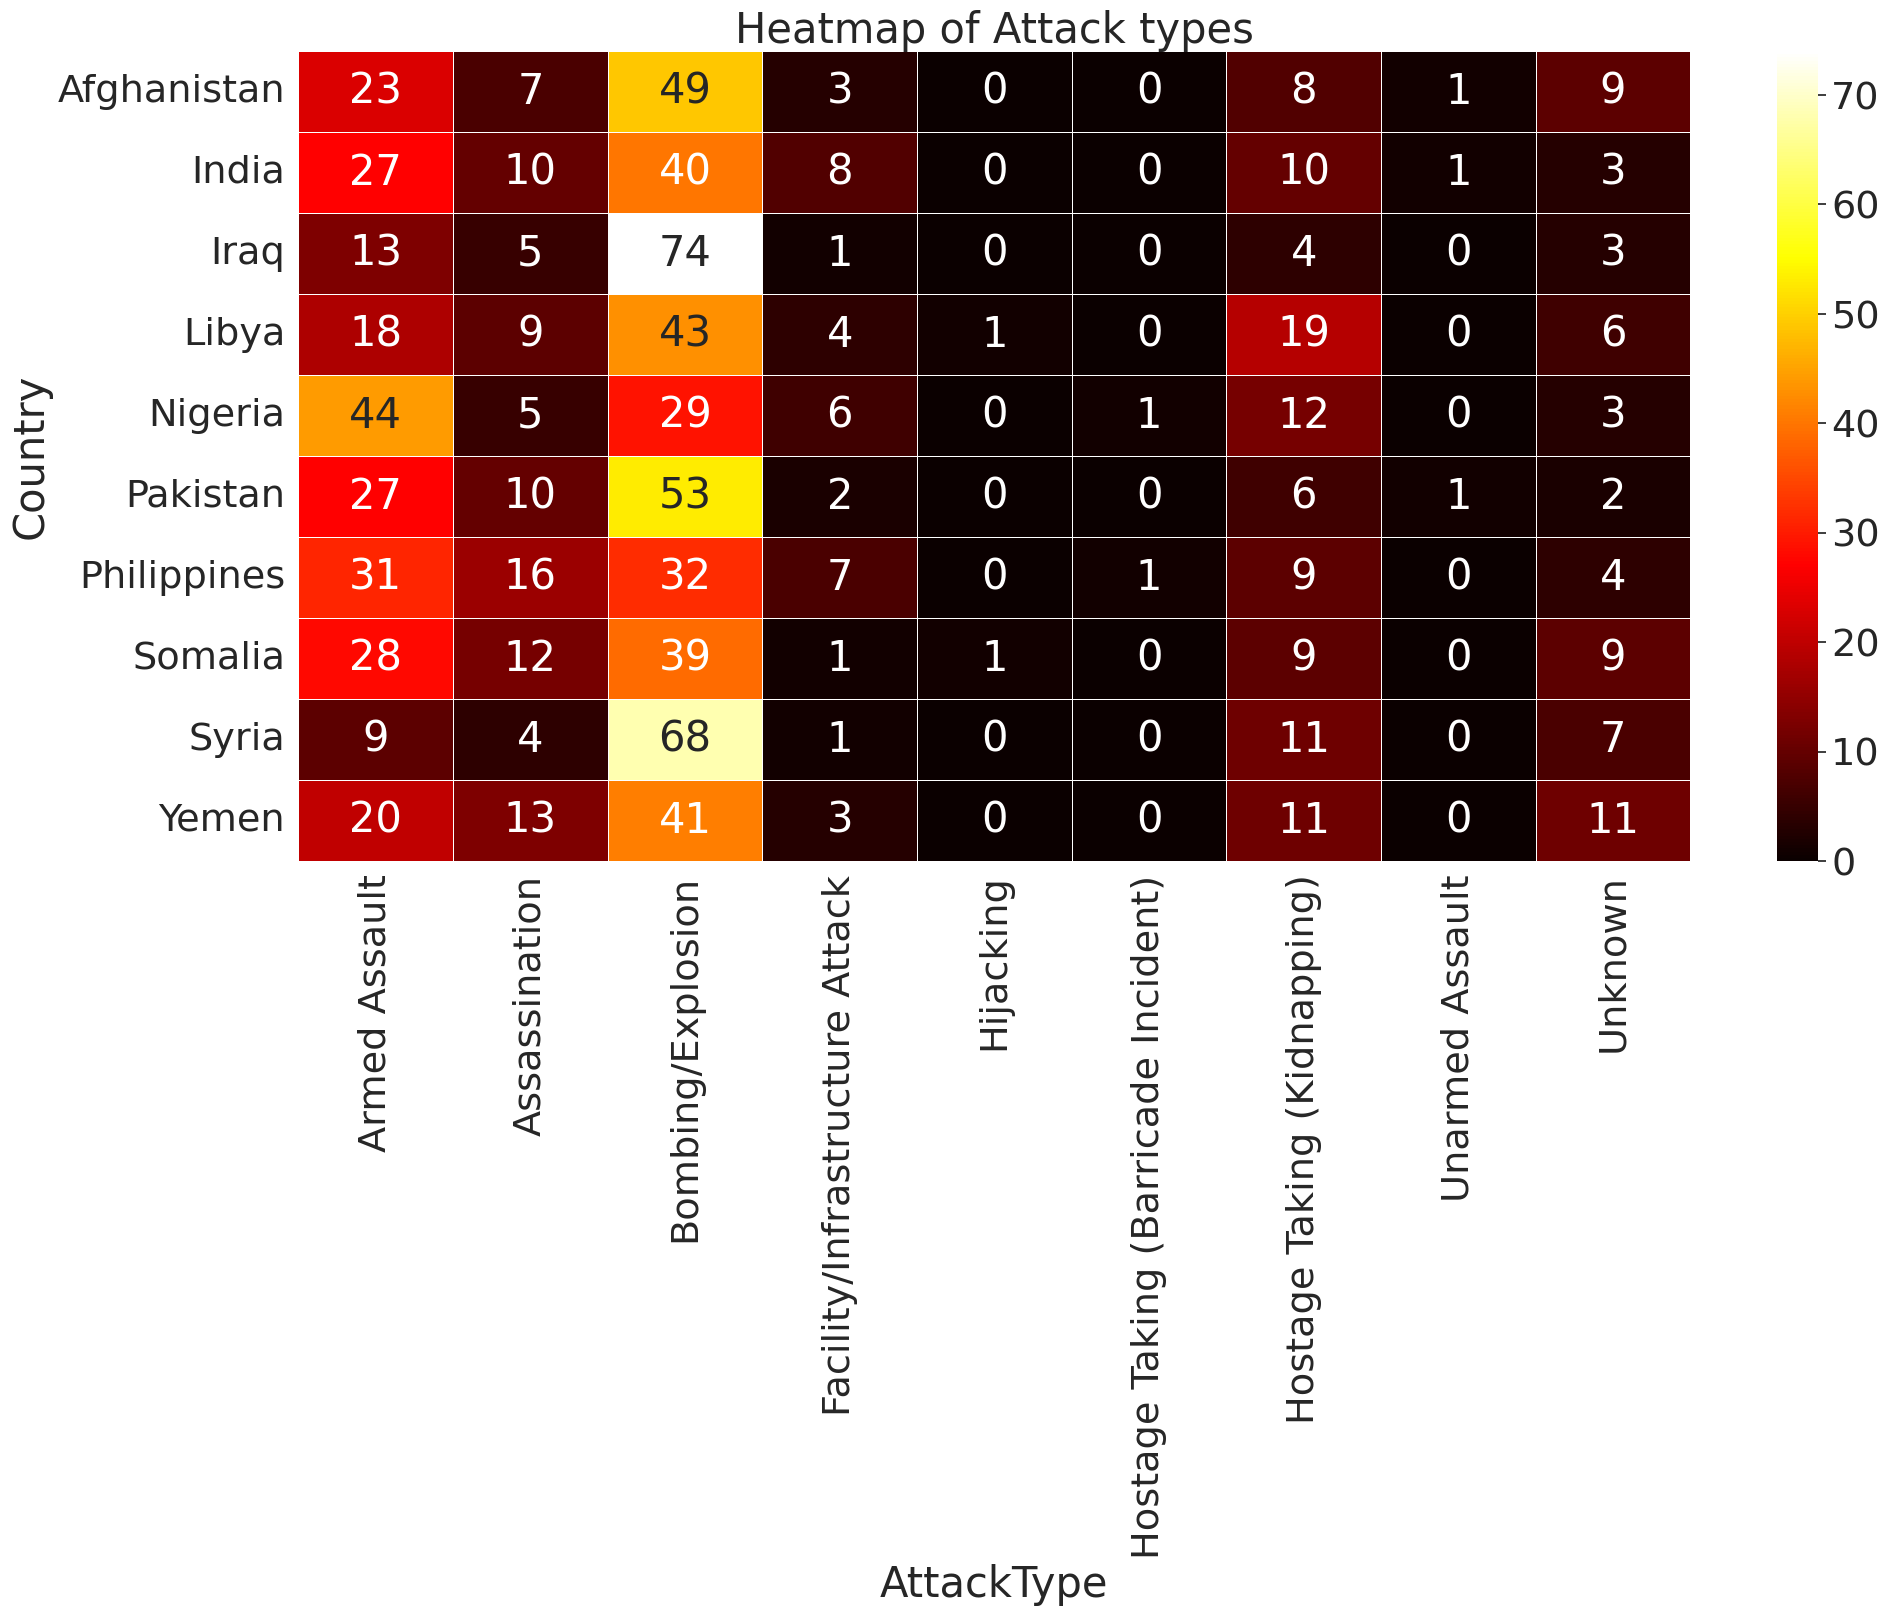

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(attacktype_counts_percentage, annot=True, fmt="d", linewidths=.7, cmap='hot')
plt.title('Heatmap of Attack types')
plt.show()

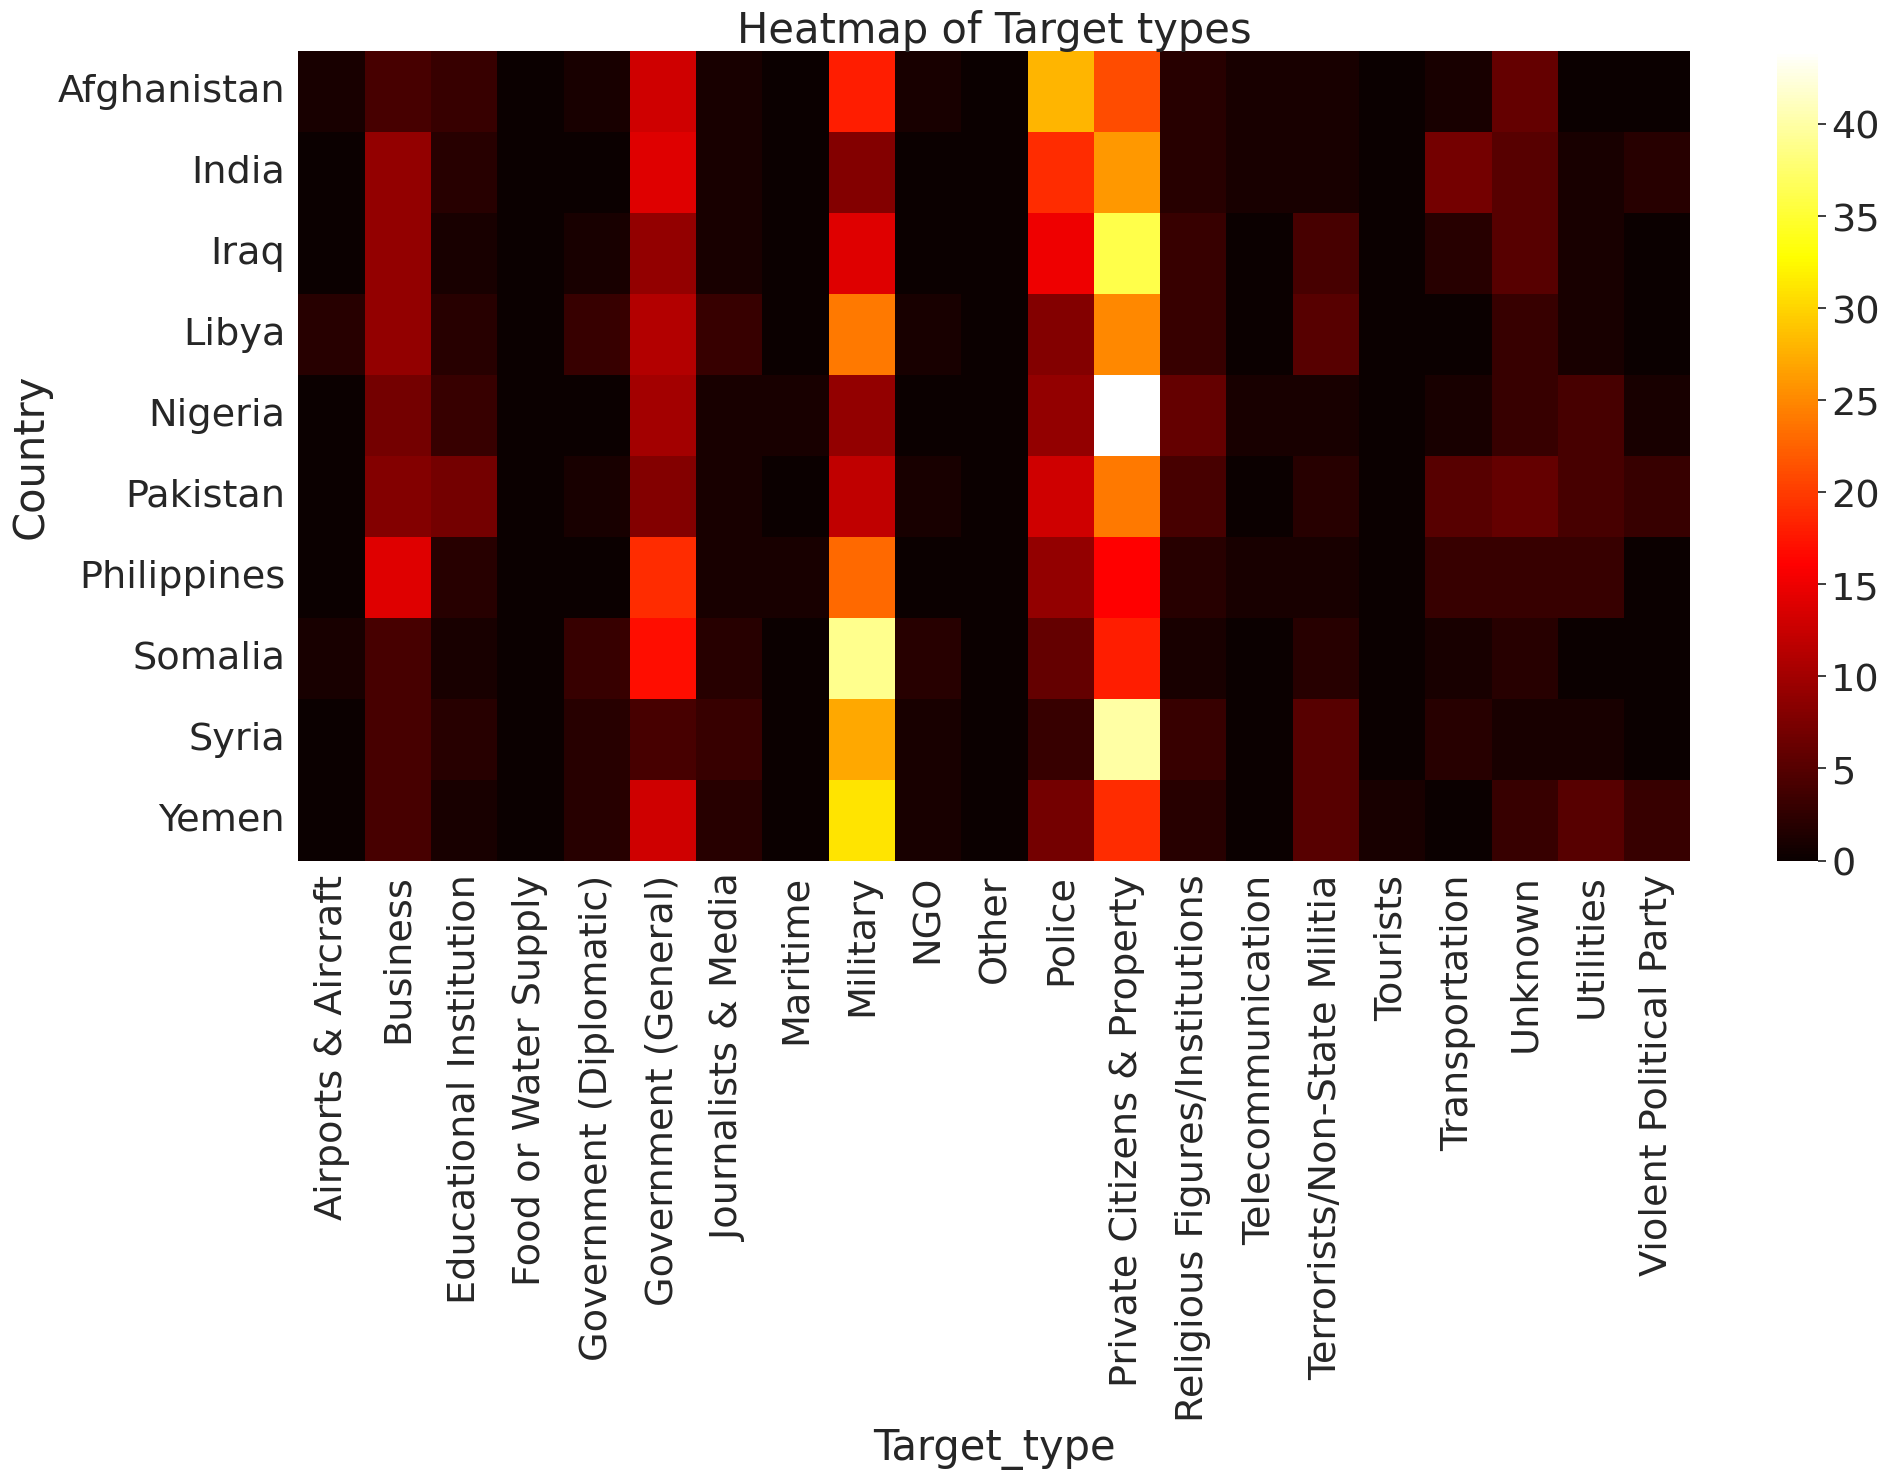

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(targettype_counts__percentage, fmt="d", cmap='hot')
plt.title('Heatmap of Target types')
plt.show()

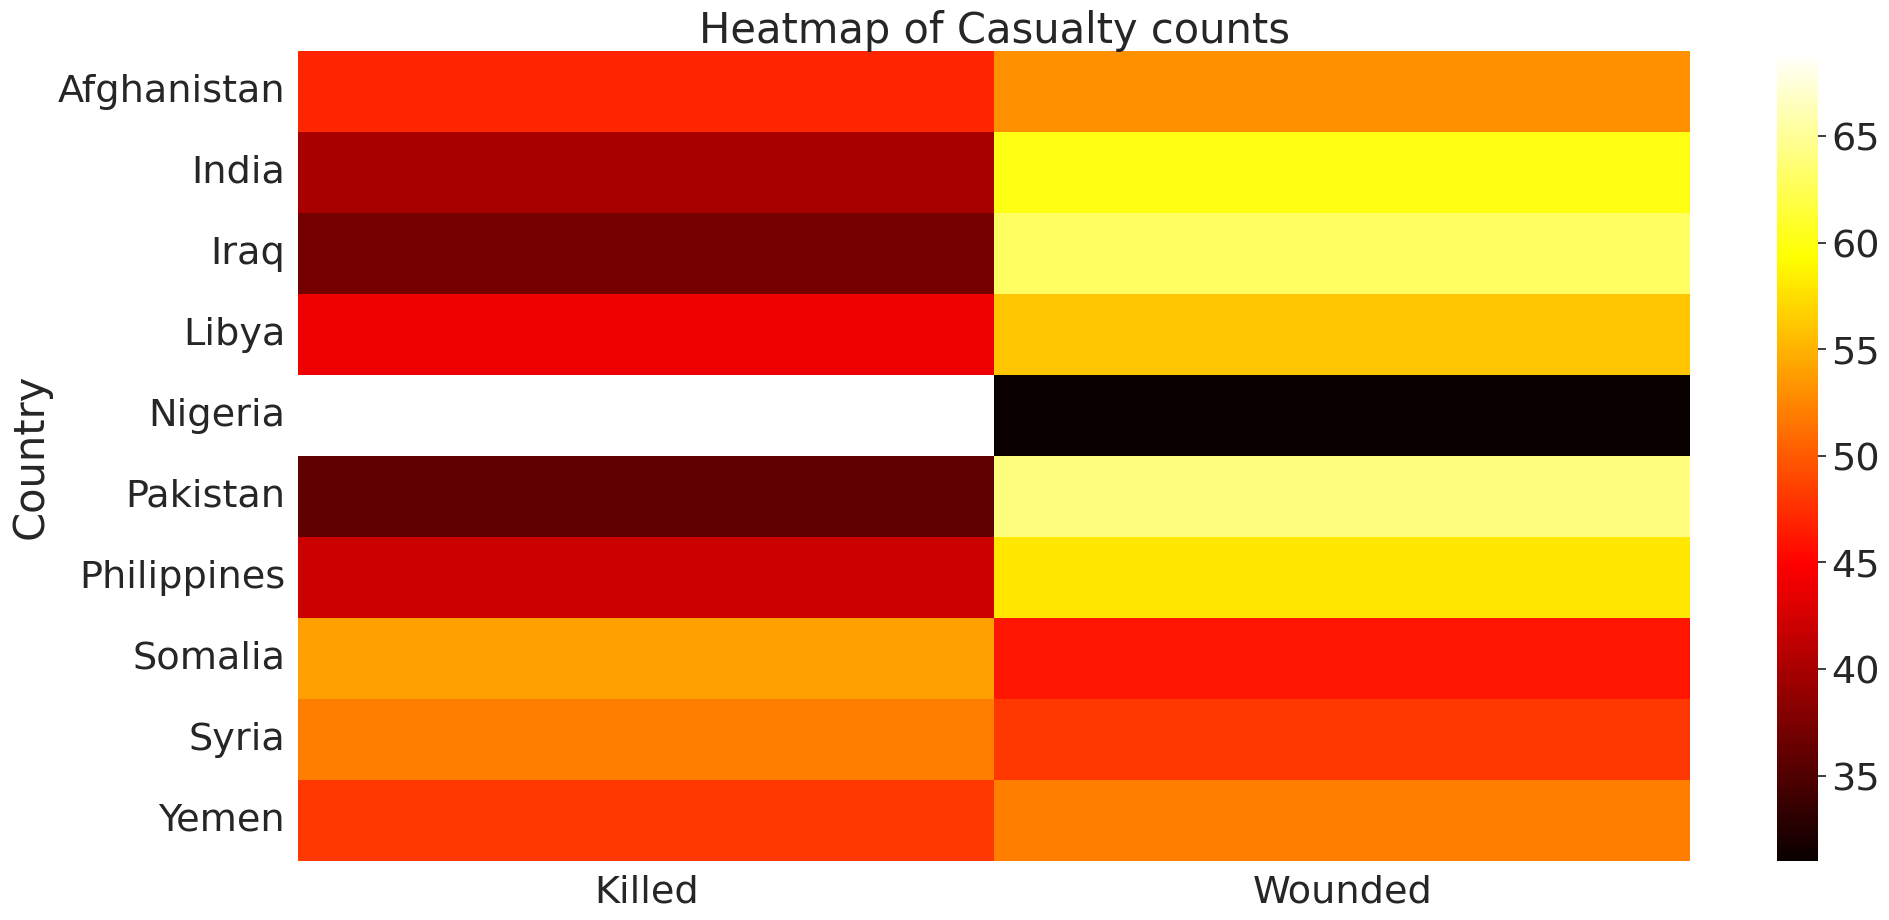

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(casualty_counts_percentage, annot=False, fmt="d",  cmap='hot')
plt.title('Heatmap of Casualty counts')
plt.show()

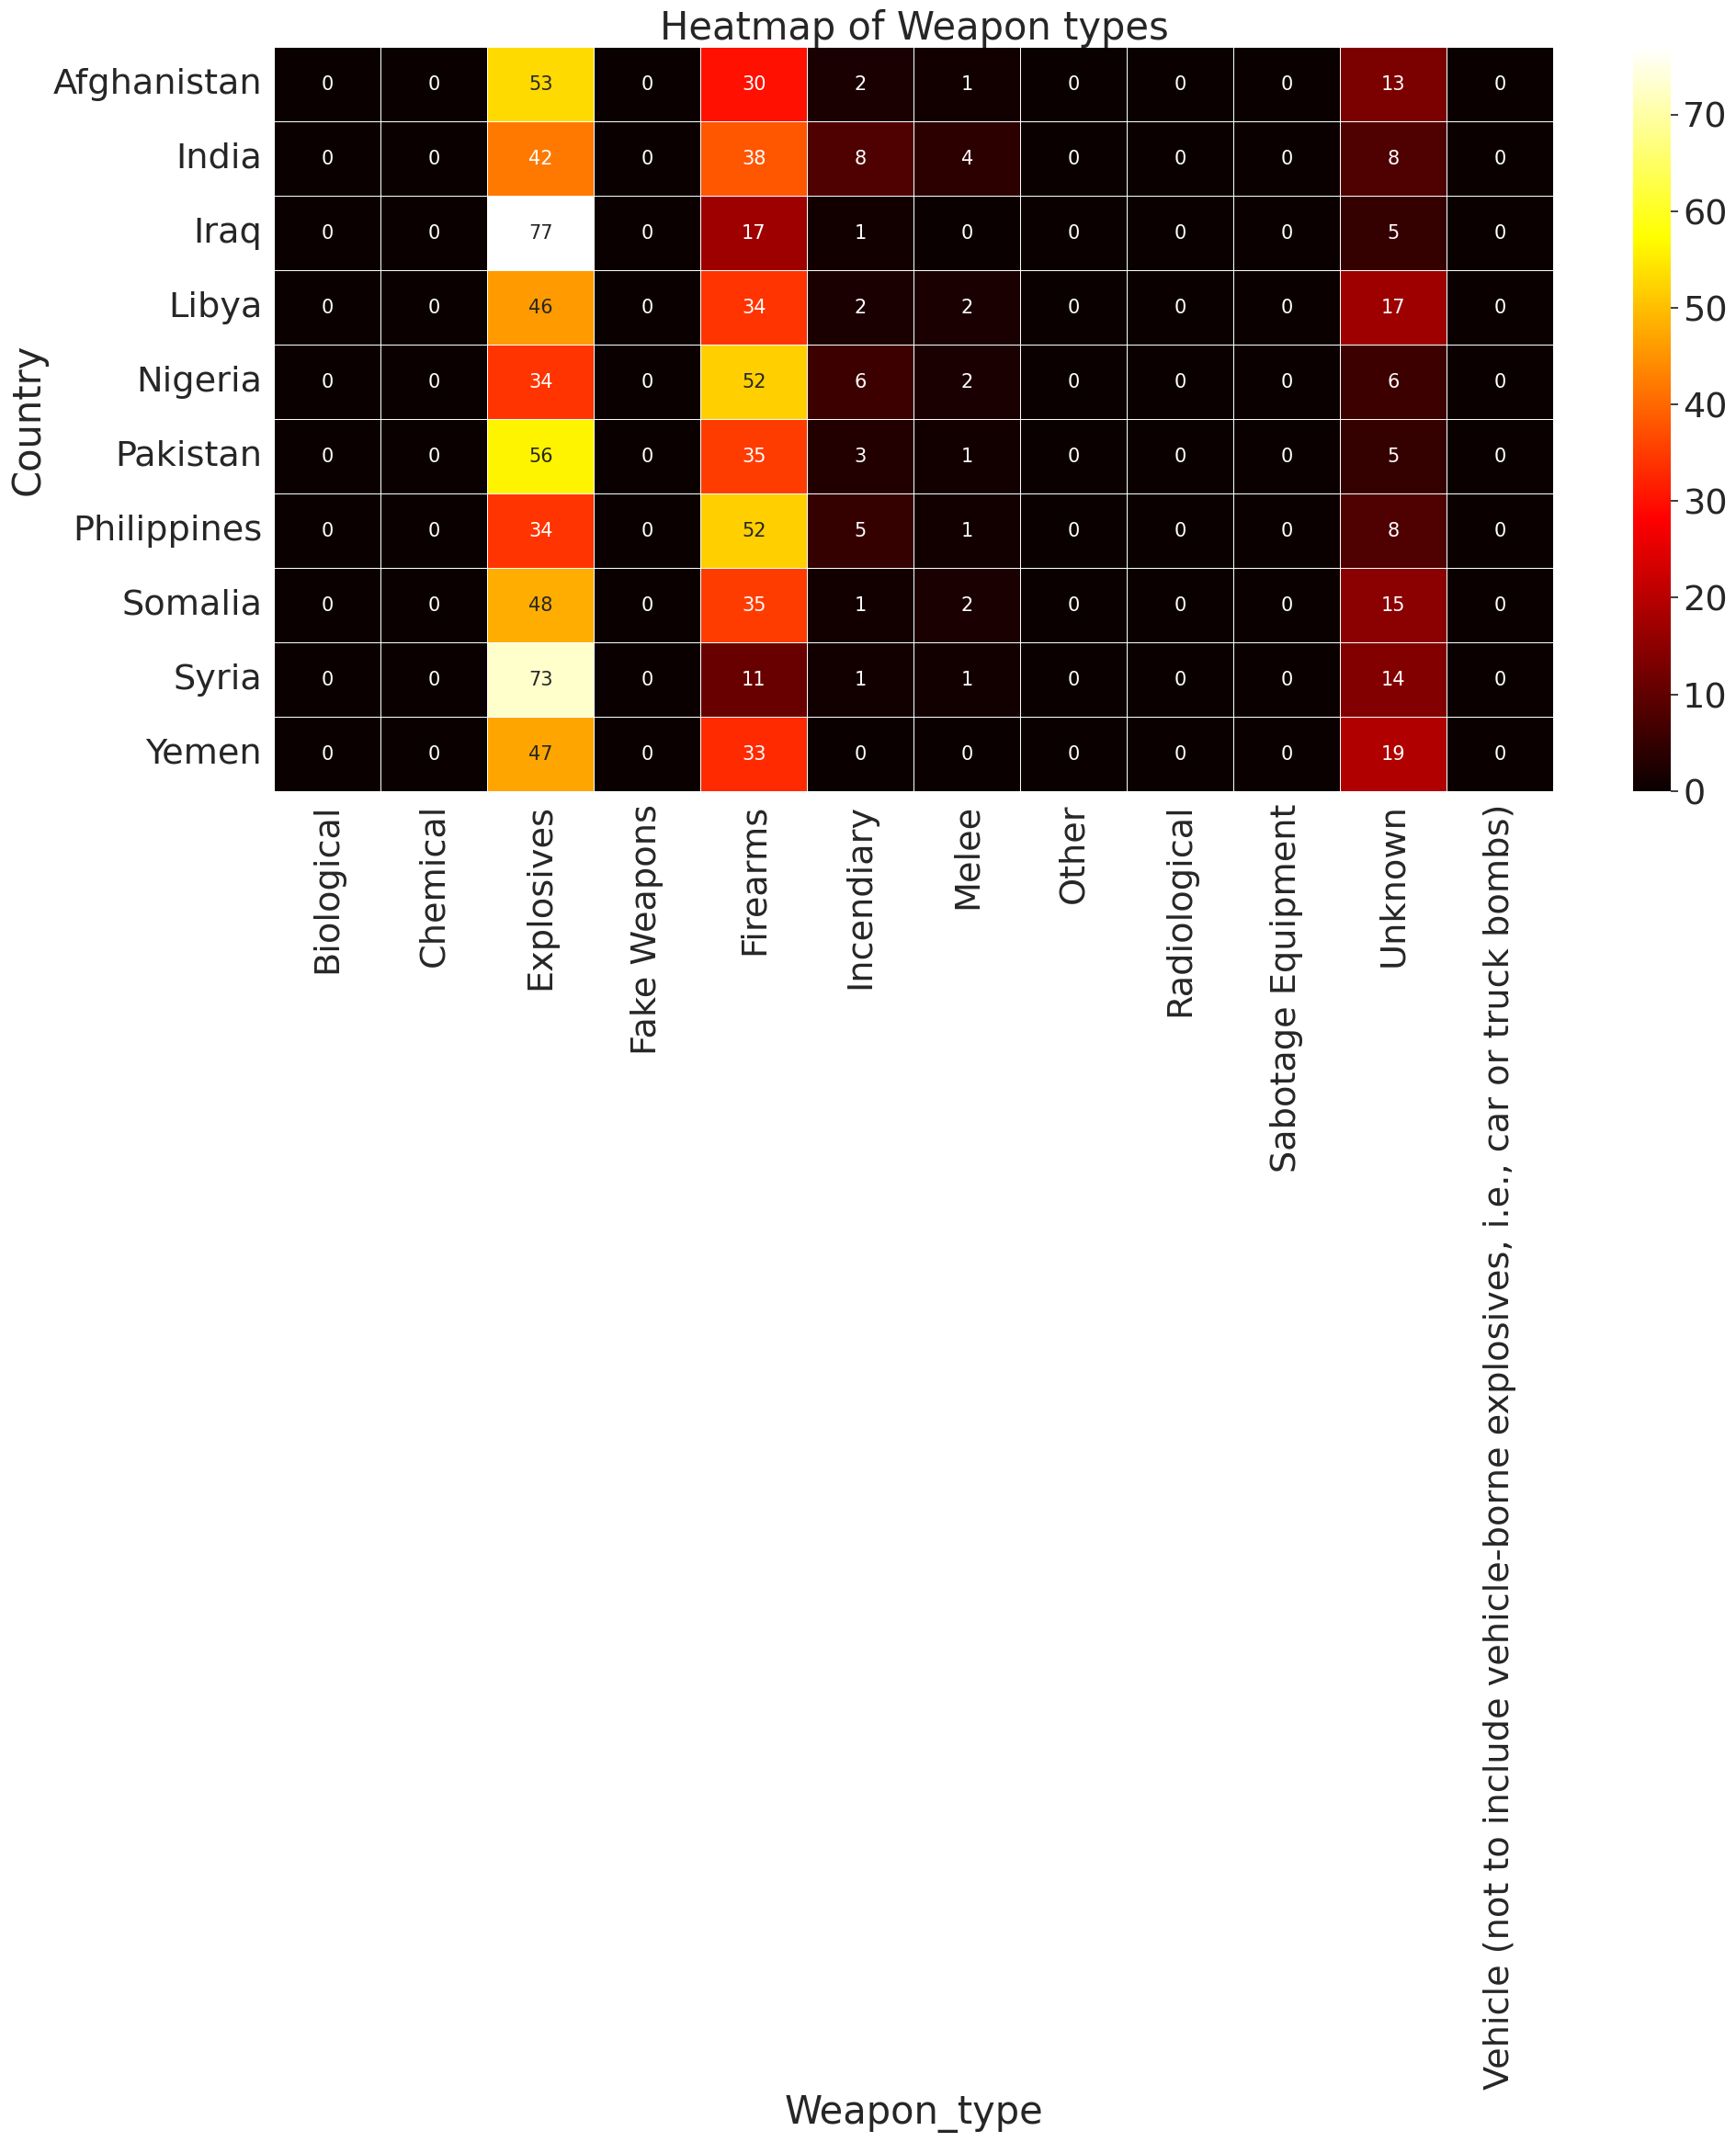

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(weapon_counts_percentage, annot=True, fmt="d", linewidths=.7, cmap='hot', annot_kws={"size": 15})
plt.title('Heatmap of Weapon types')
plt.show()

### IV. 중동&북아프리카 / 남아메리카 / 서유럽 / 동남아시아 4개 지역의 테러 공격 형태 및 사망자 사상자의 수 등 특이 사항 분석

In [26]:
topten = ['Middle East & North Africa', 'South America', 'Western Europe', 'Southeast Asia']

filtered_data = terror[terror['Region'].isin(topten)]

attacktype_counts = filtered_data.groupby('Region')['AttackType'].value_counts().unstack().fillna(0)
targettype_counts = filtered_data.groupby('Region')['Target_type'].value_counts().unstack().fillna(0)

casualty_counts = filtered_data.groupby('Region')[['Killed', 'Wounded']].sum()

weapon_counts = filtered_data.groupby('Region')['Weapon_type'].value_counts().unstack().fillna(0)

attacktype_counts_df = pd.DataFrame(attacktype_counts)
targettype_counts_df = pd.DataFrame(targettype_counts)
casualty_counts_df = pd.DataFrame(casualty_counts)
weapon_counts_df = pd.DataFrame(weapon_counts)

attacktype_counts_percentage = attacktype_counts_df.div(attacktype_counts_df.sum(axis=1), axis=0) * 100
attacktype_counts_percentage = attacktype_counts_percentage.round().astype(int)

targettype_counts__percentage = targettype_counts_df.div(targettype_counts_df.sum(axis=1), axis=0) * 100
targettype_counts__percentage = targettype_counts__percentage.round().astype(int)

casualty_counts_percentage = casualty_counts_df.div(casualty_counts_df.sum(axis=1), axis=0) * 100
casualty_counts_percentage = casualty_counts_percentage.round().astype(int)

weapon_counts_percentage = weapon_counts_df.div(weapon_counts_df.sum(axis=1), axis=0) * 100
weapon_counts_percentage = weapon_counts_percentage.round().astype(int)


attacktype_counts_percentage




AttackType                  Armed Assault  Assassination  Bombing/Explosion  \
Region                                                                        
Middle East & North Africa             18              8                 61   
South America                          20             14                 48   
Southeast Asia                         32             11                 39   
Western Europe                         10             18                 51   

AttackType                  Facility/Infrastructure Attack  Hijacking  \
Region                                                                  
Middle East & North Africa                               2          0   
South America                                            4          0   
Southeast Asia                                           8          0   
Western Europe                                          16          0   

AttackType                  Hostage Taking (Barricade Incident)  \
Region                                                            
Middle East & North Africa                                    0   
South America                                                 1   
Southeast Asia                                                1   
Western Europe                                                1   

AttackType                  Hostage Taking (Kidnapping)  Unarmed Assault  \
Region                                                                     
Middle East & North Africa                            5                0   
South America                                         7                0   
Southeast Asia                                        6                0   
Western Europe                                        2                1   

AttackType                  Unknown  
Region                               
Middle East & North Africa        4  
South America                     4  
Southeast Asia                    3  
Western Europe                    2

In [27]:
targettype_counts__percentage



Target_type                 Abortion Related  Airports & Aircraft  Business  \
Region                                                                        
Middle East & North Africa                 0                    1         8   
South America                              0                    1        18   
Southeast Asia                             0                    0        14   
Western Europe                             0                    2        25   

Target_type                 Educational Institution  Food or Water Supply  \
Region                                                                      
Middle East & North Africa                        2                     0   
South America                                     2                     0   
Southeast Asia                                    3                     0   
Western Europe                                    1                     0   

Target_type                 Government (Diplomatic)  Government (General)  \
Region                                                                      
Middle East & North Africa                        2                     8   
South America                                     2                    15   
Southeast Asia                                    1                    16   
Western Europe                                    4                    13   

Target_type                 Journalists & Media  Maritime  Military  ...  \
Region                                                               ...   
Middle East & North Africa                    1         0        18  ...   
South America                                 3         0         9  ...   
Southeast Asia                                1         1        18  ...   
Western Europe                                2         0         8  ...   

Target_type                 Police  Private Citizens & Property  \
Region                                                            
Middle East & North Africa      14                           30   
South America                   12                           17   
Southeast Asia                  11                           20   
Western Europe                  13                           20   

Target_type                 Religious Figures/Institutions  Telecommunication  \
Region                                                                          
Middle East & North Africa                               3                  0   
South America                                            2                  1   
Southeast Asia                                           3                  1   
Western Europe                                           2                  0   

Target_type                 Terrorists/Non-State Militia  Tourists  \
Region                                                               
Middle East & North Africa                             3         0   
South America                                          0         0   
Southeast Asia                                         1         0   
Western Europe                                         2         1   

Target_type                 Transportation  Unknown  Utilities  \
Region                                                           
Middle East & North Africa               2        4          2   
South America                            6        1         10   
Southeast Asia                           4        2          3   
Western Europe                           3        2          1   

Target_type                 Violent Political Party  
Region                                               
Middle East & North Africa                        1  
South America                                     0  
Southeast Asia                                    0  
Western Europe                                    0  

[4 rows x 22 columns]

In [28]:
casualty_counts_percentage



Killed  Wounded
Region                                     
Middle East & North Africa      39       61
South America                   63       37
Southeast Asia                  37       63
Western Europe                  27       73

In [29]:
weapon_counts_percentage

Weapon_type                 Biological  Chemical  Explosives  Fake Weapons  \
Region                                                                       
Middle East & North Africa           0         0          64             0   
South America                        0         0          48             0   
Southeast Asia                       0         0          40             0   
Western Europe                       0         0          52             0   

Weapon_type                 Firearms  Incendiary  Melee  Other  Radiological  \
Region                                                                         
Middle East & North Africa        24           2      2      0             0   
South America                     34           6      1      0             0   
Southeast Asia                    45           7      1      0             0   
Western Europe                    22          18      2      0             0   

Weapon_type                 Sabotage Equipment  Unknown  \
Region                                                    
Middle East & North Africa                   0        7   
South America                                0       11   
Southeast Asia                               0        6   
Western Europe                               0        5   

Weapon_type                 Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)  
Region                                                                                                   
Middle East & North Africa                                                  0                            
South America                                                               0                            
Southeast Asia                                                              0                            
Western Europe                                                              0

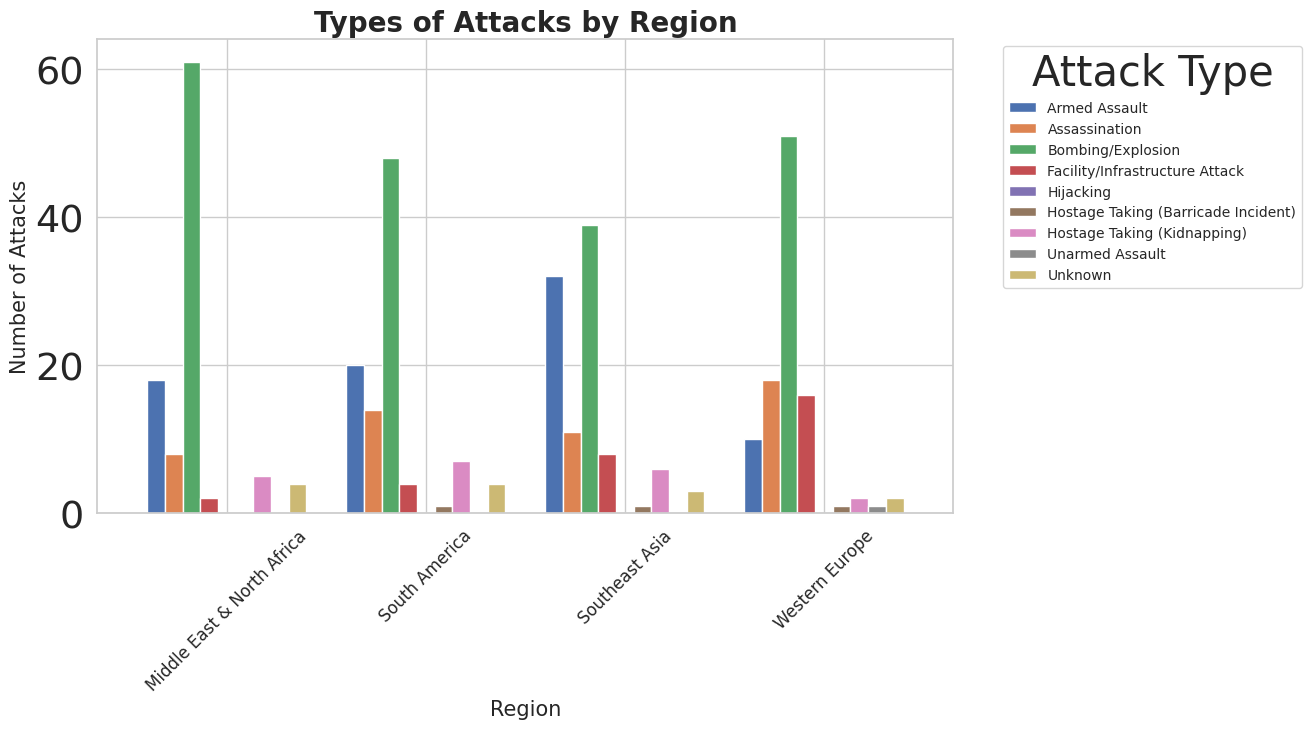

In [30]:

ax = attacktype_counts_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Types of Attacks by Region',fontweight='bold', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

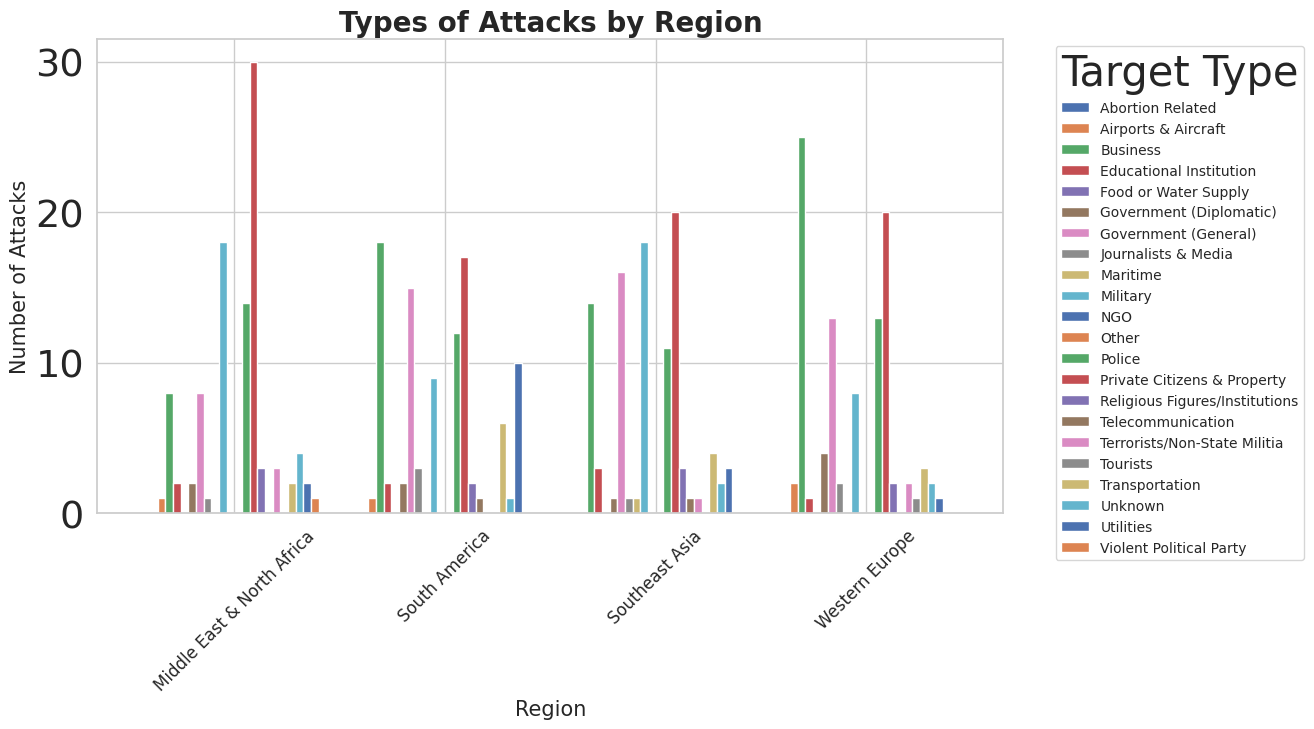

In [31]:

ax = targettype_counts__percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Types of Attacks by Region',fontweight='bold', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

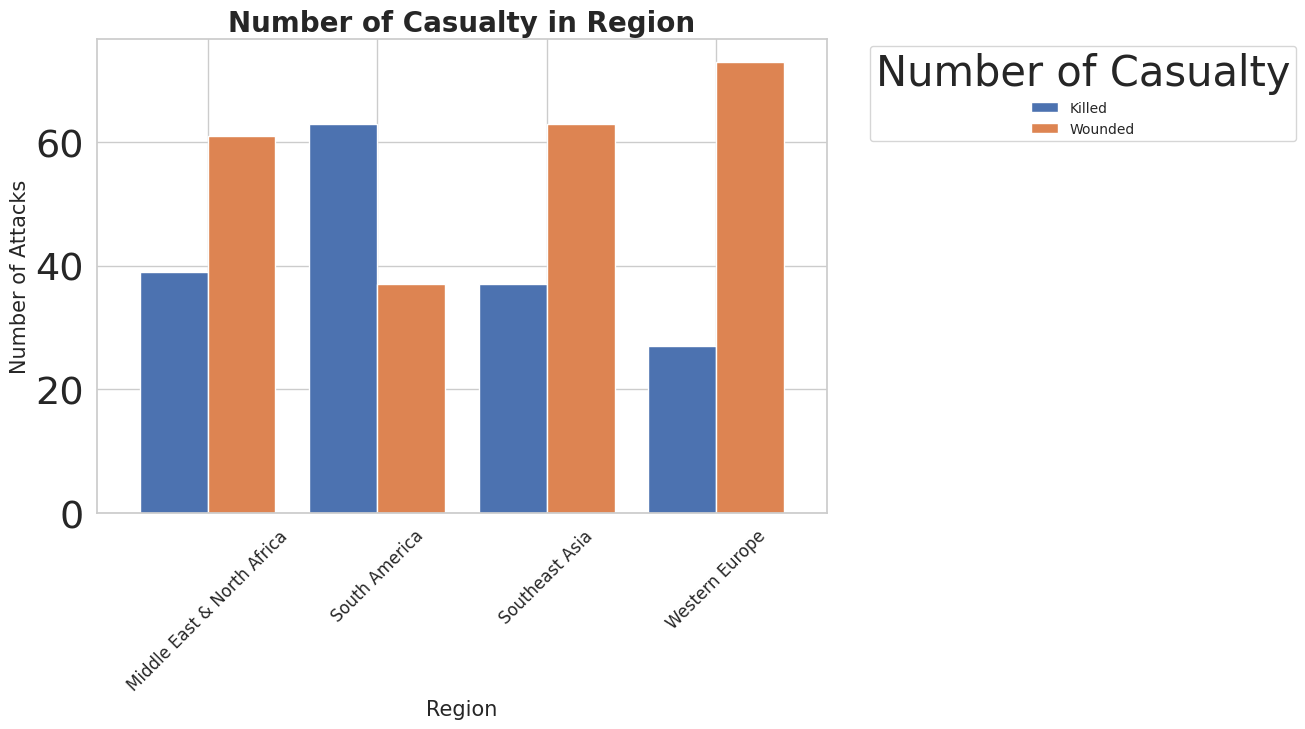

In [32]:

ax = casualty_counts_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Number of Casualty in Region',fontweight='bold', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.legend(title='Number of Casualty', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

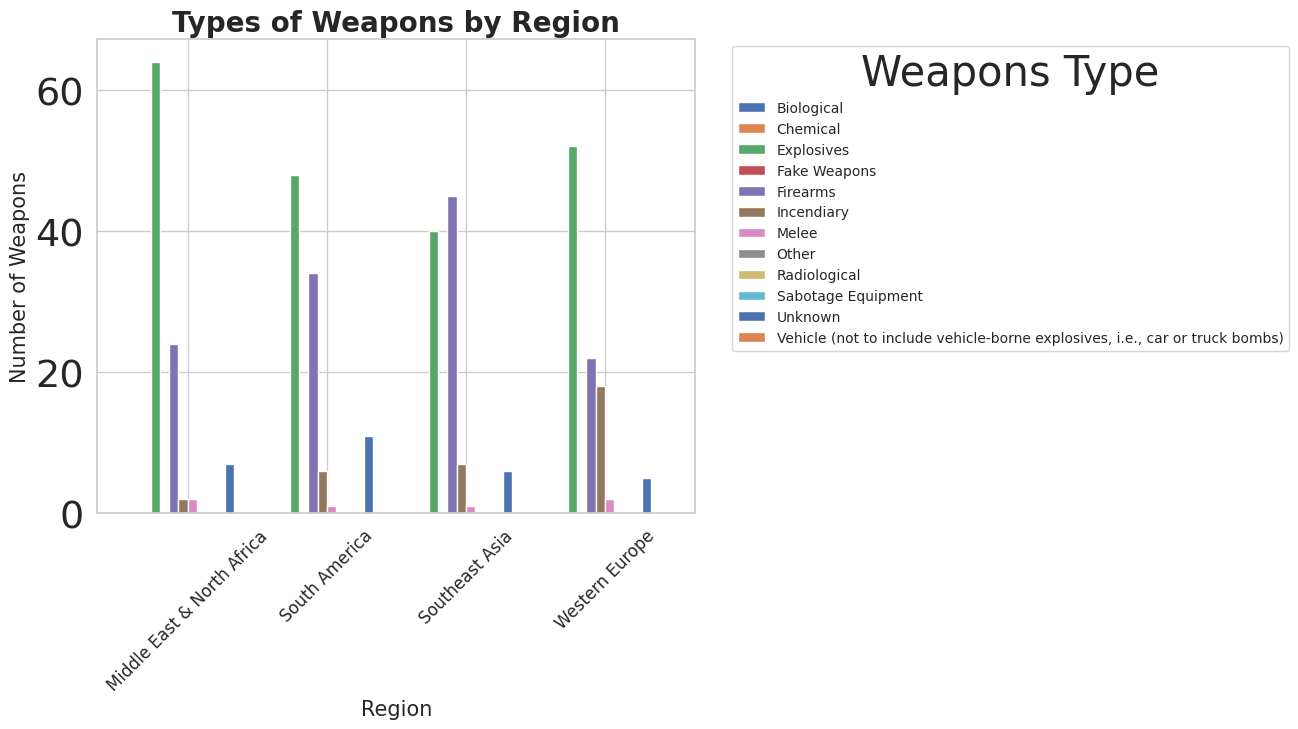

In [33]:

ax = weapon_counts_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Types of Weapons by Region',fontweight='bold', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Weapons', fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.legend(title='Weapons Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

## V. 테러 위협: 데이터로 전하는 경고

## 1) 과연 한국은 테러로 부터 안전한 것인가?

In [34]:
# def color_point(x):
#     if x>=30:
#         color='red'
#     elif ((x>0 and x<30)):
#         color='blue'
#     else:
#         color='green'
#     return color  

# def point_size(x):
#     if (x>30 and x<100):
#         size=2
#     elif (x>=100 and x<500):
#         size=8
#     elif x>=500:
#         size=16
#     else:
#         size=0.5
#     return size   


# terror_korea=terror[terror['Country']=='South Korea']
# terror_korea_fol=terror_korea.copy()
# terror_korea_fol.dropna(subset=['latitude','longitude'],inplace=True)
# location_ind=terror_korea_fol[['latitude','longitude']][:5000]
# city_ind=terror_korea_fol['city'][:5000]
# killed_ind=terror_korea_fol['Killed'][:5000]
# wound_ind=terror_korea_fol['Wounded'][:5000]
# target_ind=terror_korea_fol['Target_type'][:5000]

# map4 = folium.Map(location=[37.715133, 126.734086],tiles='Cartodb Positron',zoom_start=6.0)
# for point in location_ind.index:
#     folium.CircleMarker(list(location_ind.loc[point].values),popup='<b>City: </b>'+str(city_ind[point])+'<br><b>Killed: </b>'+str(killed_ind[point])+\
#                         '<br><b>Injured: </b>'+str(wound_ind[point])+'<br><b>Target: </b>'+str(target_ind[point]),radius=point_size(killed_ind[point]),color=color_point(killed_ind[point]),fill_color=color_point(killed_ind[point])).add_to(map4)
# map4

![Screenshot from 2024-01-10 17-34-36.png](<attachment:Screenshot from 2024-01-10 17-34-36.png>)
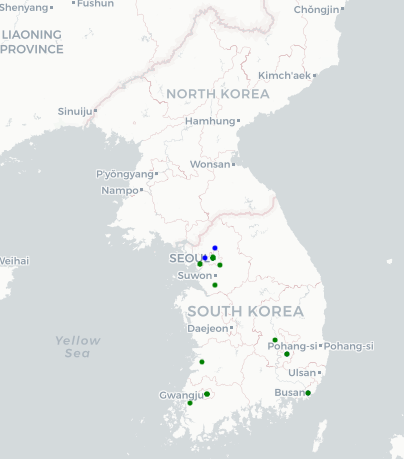

# 2) 년도별 한국의 테러 증가량

In [35]:
top_groups10 = terror_korea[terror_korea['Group'].isin(terror_korea['Group'].value_counts()[1:11].index)]
ct = pd.crosstab(top_groups10.Year, top_groups10.Group)
ax = ct.plot(color=sns.color_palette('Paired', 10))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Terrorist Group')

fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()


NameError: name 'terror_korea' is not defined

# 3) 한국의 주요 테러 타겟

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(25, 12))

ind_groups = terror_korea['Group'].value_counts()[1:11].index
ind_groups = terror_korea[terror_korea['Group'].isin(ind_groups)]

sns.countplot(y='Group', data=ind_groups, ax=ax[0], palette='BuGn') 
ax[0].set_title('Top Terrorist Groups', fontweight='bold')

sns.countplot(y='AttackType', data=terror_korea, ax=ax[1], palette='BuPu') 
ax[1].set_title('Favorite Attack Types', fontweight='bold')

plt.subplots_adjust(hspace=0.3, wspace=0.6)

ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)

plt.show()


# <span style='color:red'>한국, 더 이상 안전지대가 아닙니다. 우리 모두 경각심을 가지고 비인륜적인 행위에 반대합시다.</span>

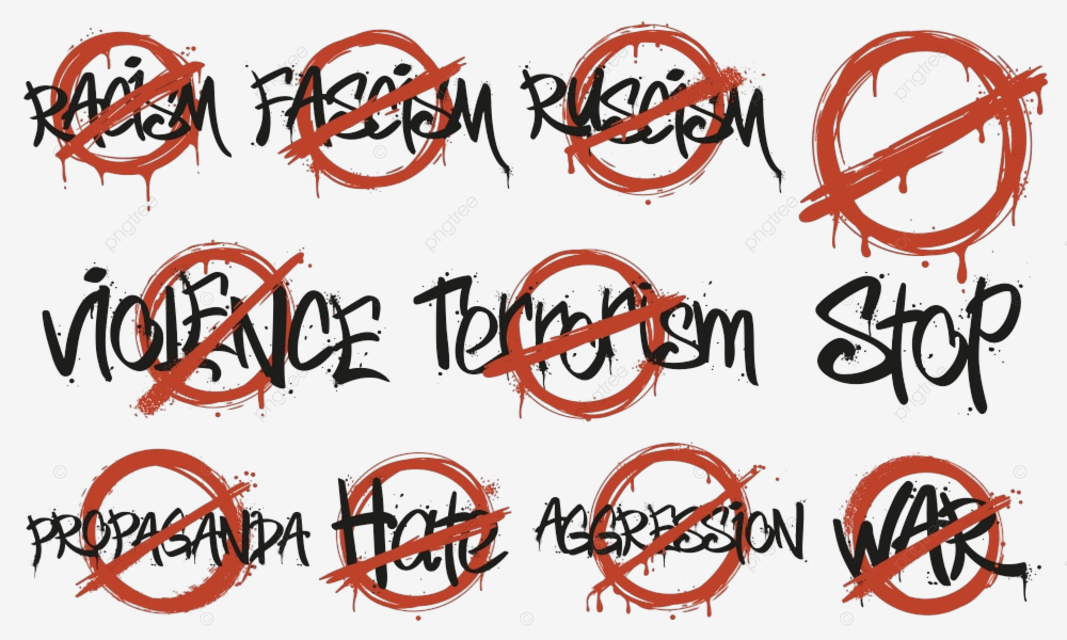